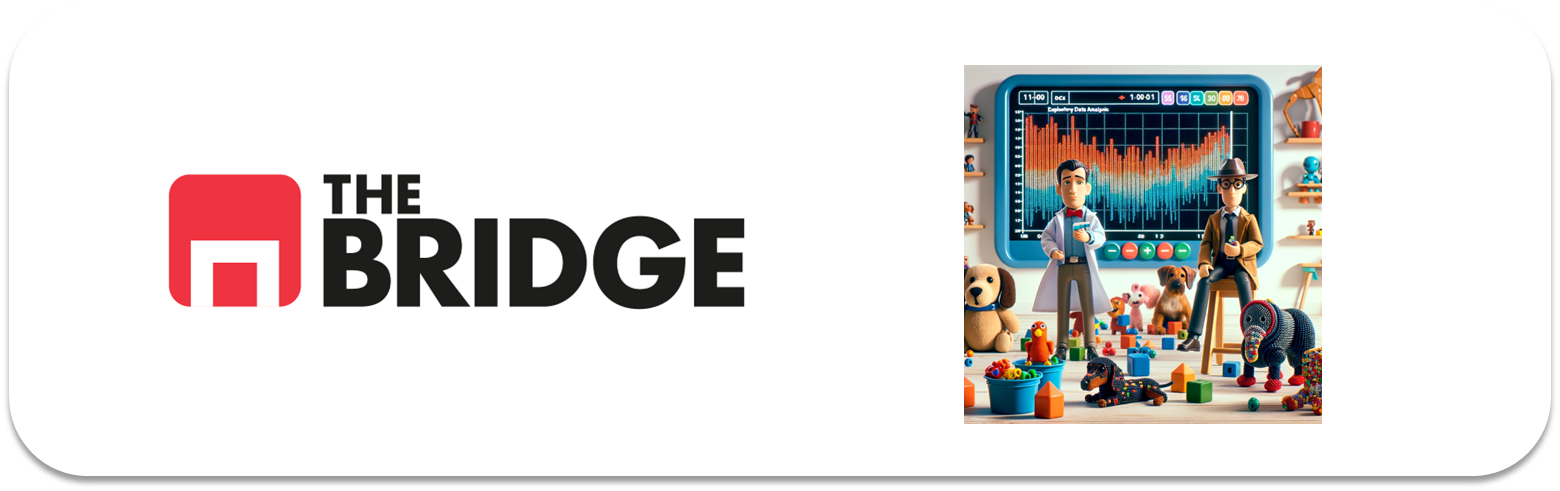

## PRACTICA OBLIGATORIA: ANÁLISIS MULTIVARIANTE

* La práctica obligatoria de esta unidad consiste en completar el análisis del dataset del Titanic, dirigido por una serie de preguntas, y de terminar de analizar algunos aspectos del dataset de viajes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [1103]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from bootcampviztools import plot_categorical_numerical_relationship, plot_combined_graphs, \
pinta_distribucion_categoricas, plot_grouped_boxplots, plot_categorical_relationship_fin, plot_grouped_histograms, \
grafico_dispersion_con_correlacion, bubble_plot

## #1 TITANIC

### #1.1

Carga en un dataframe el dataset del titanic, que está en la ruta "./data/titanic.csv".

In [1104]:
df_titanic = pd.read_csv("./data/titanic.csv")
df_titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


### #1.2

Deshazte de las columnas "deck", "survived", "pclass" y "embarked" porque no las emplearemos, la primera por su cantidad de nulos y el resto porque son variantes de otras que ya existen y cuyos valores resultan más expresivos a la hora de hacer un análisis. 

In [1105]:
df_titanic.drop(["deck","survived","pclass","embarked"], axis=1,inplace=True)
df_titanic

,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone
0,male,22.0,1,0,7.2500,Third,man,True,Southampton,no,False
1,female,38.0,1,0,71.2833,First,woman,False,Cherbourg,yes,False
2,female,26.0,0,0,7.9250,Third,woman,False,Southampton,yes,True
3,female,35.0,1,0,53.1000,First,woman,False,Southampton,yes,False
4,male,35.0,0,0,8.0500,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...
886,male,27.0,0,0,13.0000,Second,man,True,Southampton,no,True
887,female,19.0,0,0,30.0000,First,woman,False,Southampton,yes,True
888,female,NaN,1,2,23.4500,Third,woman,False,Southampton,no,False
889,male,26.0,0,0,30.0000,First,man,True,Cherbourg,yes,True


In [1106]:
df_titanic.head(10)

,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone
0,male,22.0,1,0,7.2500,Third,man,True,Southampton,no,False
1,female,38.0,1,0,71.2833,First,woman,False,Cherbourg,yes,False
2,female,26.0,0,0,7.9250,Third,woman,False,Southampton,yes,True
3,female,35.0,1,0,53.1000,First,woman,False,Southampton,yes,False
4,male,35.0,0,0,8.0500,Third,man,True,Southampton,no,True
5,male,NaN,0,0,8.4583,Third,man,True,Queenstown,no,True
6,male,54.0,0,0,51.8625,First,man,True,Southampton,no,True
7,male,2.0,3,1,21.0750,Third,child,False,Southampton,no,False
8,female,27.0,0,2,11.1333,Third,woman,False,Southampton,yes,False
9,female,14.0,1,0,30.0708,Second,child,False,Cherbourg,yes,False


### #1.3

Suma las columnas "parch" y "sibsp" para tener el número de parientes de cada pasajero, guarda el resultado en otra columna "family_members", luego deshazte de "parch" y "sibsp"

In [1107]:
family_member = df_titanic["parch"]+df_titanic["sibsp"]
df_titanic["family_member"] = family_member
family_member

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Length: 891, dtype: int64

In [1108]:
df_titanic.head(10)

,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone,family_member
0,male,22.0,1,0,7.2500,Third,man,True,Southampton,no,False,1
1,female,38.0,1,0,71.2833,First,woman,False,Cherbourg,yes,False,1
2,female,26.0,0,0,7.9250,Third,woman,False,Southampton,yes,True,0
3,female,35.0,1,0,53.1000,First,woman,False,Southampton,yes,False,1
4,male,35.0,0,0,8.0500,Third,man,True,Southampton,no,True,0
5,male,NaN,0,0,8.4583,Third,man,True,Queenstown,no,True,0
6,male,54.0,0,0,51.8625,First,man,True,Southampton,no,True,0
7,male,2.0,3,1,21.0750,Third,child,False,Southampton,no,False,4
8,female,27.0,0,2,11.1333,Third,woman,False,Southampton,yes,False,2
9,female,14.0,1,0,30.0708,Second,child,False,Cherbourg,yes,False,1


### #1.4

Imputa la moda a los valores nulos de "embark_town"

In [1109]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sex            891 non-null    object 
 1   age            714 non-null    float64
 2   sibsp          891 non-null    int64  
 3   parch          891 non-null    int64  
 4   fare           891 non-null    float64
 5   class          891 non-null    object 
 6   who            891 non-null    object 
 7   adult_male     891 non-null    bool   
 8   embark_town    889 non-null    object 
 9   alive          891 non-null    object 
 10  alone          891 non-null    bool   
 11  family_member  891 non-null    int64  
dtypes: bool(2), float64(2), int64(3), object(5)
memory usage: 71.5+ KB


In [1110]:
moda_embark_town = df_titanic["embark_town"].mode()[0]
df_titanic["embark_town"].fillna(moda_embark_town, inplace=True)
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sex            891 non-null    object 
 1   age            714 non-null    float64
 2   sibsp          891 non-null    int64  
 3   parch          891 non-null    int64  
 4   fare           891 non-null    float64
 5   class          891 non-null    object 
 6   who            891 non-null    object 
 7   adult_male     891 non-null    bool   
 8   embark_town    891 non-null    object 
 9   alive          891 non-null    object 
 10  alone          891 non-null    bool   
 11  family_member  891 non-null    int64  
dtypes: bool(2), float64(2), int64(3), object(5)
memory usage: 71.5+ KB


C:\Users\User\AppData\Local\Temp\ipykernel_26360\3565119440.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_titanic["embark_town"].fillna(moda_embark_town, inplace=True)


### #1.5

Imputa la media a los valores faltantes de "age", si quieres puedes hacer algo más preciso (por ejemplo considerando además la columna "who")

In [1111]:
media_age = df_titanic.groupby("who")["age"].mean()
media_age

who
child     6.369518
man      33.173123
woman    32.000000
Name: age, dtype: float64

In [1112]:
media_age = df_titanic["age"].mean()
df_titanic["age"].fillna(media_age, inplace=True)
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sex            891 non-null    object 
 1   age            891 non-null    float64
 2   sibsp          891 non-null    int64  
 3   parch          891 non-null    int64  
 4   fare           891 non-null    float64
 5   class          891 non-null    object 
 6   who            891 non-null    object 
 7   adult_male     891 non-null    bool   
 8   embark_town    891 non-null    object 
 9   alive          891 non-null    object 
 10  alone          891 non-null    bool   
 11  family_member  891 non-null    int64  
dtypes: bool(2), float64(2), int64(3), object(5)
memory usage: 71.5+ KB


C:\Users\User\AppData\Local\Temp\ipykernel_26360\3841590434.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_titanic["age"].fillna(media_age, inplace=True)


### 1.6

Realiza los análisis bivariantes o multivariantes que necesites, así como los test de hipótesis necesarios para contestar a las siguientes preguntas. Nota: utiliza la variable "alive" para saber si un pasajero sobrevivió o no:

1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?

2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?

5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?

6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.

7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

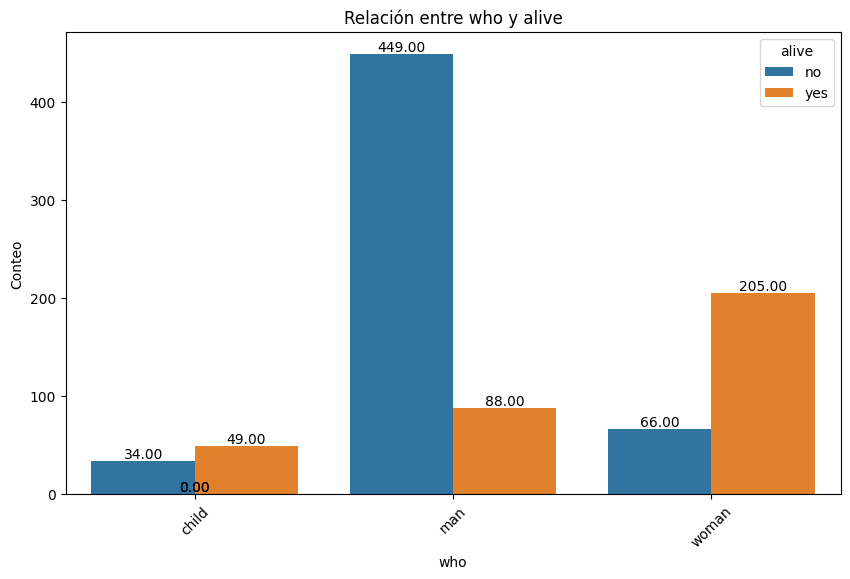

In [1113]:
plot_categorical_relationship_fin(df_titanic, "who","alive", show_values= True)

In [1114]:
df_titanic.groupby("who", as_index = False)["alive"].value_counts()

,who,alive,count
0,child,yes,49
1,child,no,34
2,man,no,449
3,man,yes,88
4,woman,yes,205
5,woman,no,66


* Observamos que hay una relación entre el género y la supervivencia en términos absolutos (primero salvaban a mujeres y niños)

In [1115]:
df_titanic.groupby("who", as_index = False)["alive"].value_counts(normalize = True)

,who,alive,proportion
0,child,yes,0.590361
1,child,no,0.409639
2,man,no,0.836127
3,man,yes,0.163873
4,woman,yes,0.756458
5,woman,no,0.243542


* También hay una relación en términos relativos. Los valores cambian a la vez pero no en la misma dirección.

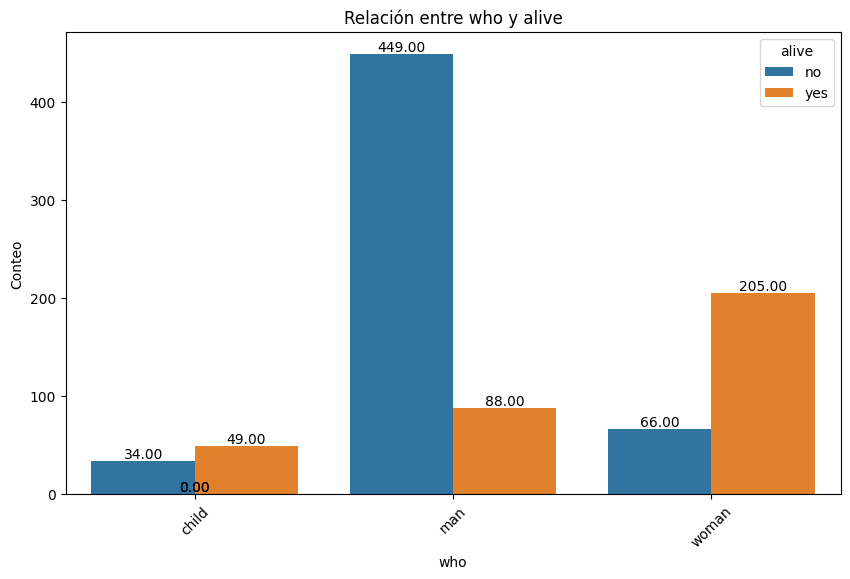

In [1116]:
plot_categorical_relationship_fin(df_titanic, "who","alive", show_values= True)

In [1117]:
df_titanic.groupby("class", as_index = False)["alive"].value_counts()

,class,alive,count
0,First,yes,136
1,First,no,80
2,Second,no,97
3,Second,yes,87
4,Third,no,372
5,Third,yes,119


* Claramente la tercera clase, el pasaje más barato, sale perjudicada en esta comparación en términos absolutos.
    - En primera clase se salvan más personas que en el resto, además de que es la única donde la supervivencia está por encima del fallecimiento.
    - La segunda clase está un poco más equilibrado, pero los supervivientes siguen siendo menos.
    - La tercera clase es la que menos supervivientes contiene, con diferencia.

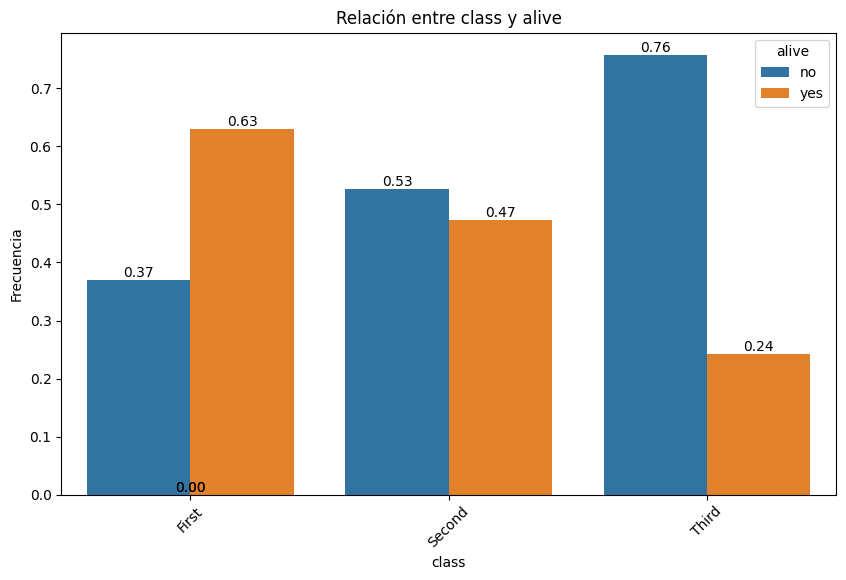

In [1118]:
plot_categorical_relationship_fin(df_titanic, "class","alive", relative_freq=True,show_values= True)

In [1119]:
df_titanic.groupby("class", as_index = False)["alive"].value_counts(normalize = True)

,class,alive,proportion
0,First,yes,0.629630
1,First,no,0.370370
2,Second,no,0.527174
3,Second,yes,0.472826
4,Third,no,0.757637
5,Third,yes,0.242363


* Observamos lo mismo en términos relativos y en absolutos

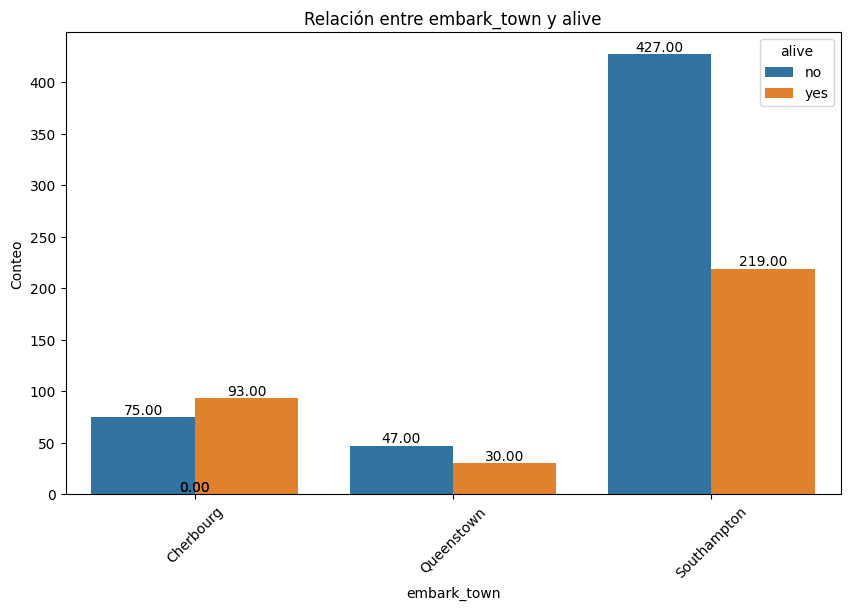

In [1120]:
plot_categorical_relationship_fin(df_titanic, "embark_town","alive",show_values= True)

In [1121]:
df_titanic.groupby("class", as_index = False)["alive"].value_counts()

,class,alive,count
0,First,yes,136
1,First,no,80
2,Second,no,97
3,Second,yes,87
4,Third,no,372
5,Third,yes,119


* A simple vista, parece que la proporción de not alive es mayor en todos los lugares, excepto en Cherbourg que hay más supervivientes.
* Southampton destaca en numero de no supervivientes, pero sí que es verdad que a simple vista también es la ciudad en la que más personas embarcaron.


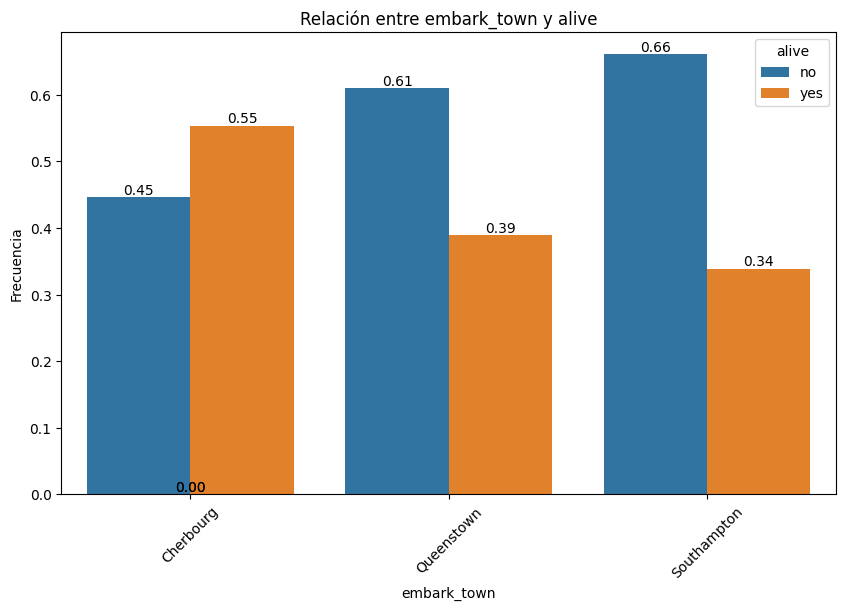

In [1122]:
plot_categorical_relationship_fin(df_titanic, "embark_town","alive",relative_freq=True,show_values= True)

In [1123]:
df_titanic.groupby("class", as_index = False)["alive"].value_counts(normalize=True)

,class,alive,proportion
0,First,yes,0.629630
1,First,no,0.370370
2,Second,no,0.527174
3,Second,yes,0.472826
4,Third,no,0.757637
5,Third,yes,0.242363


* Cherbourg no está alineada con las demás y habría que analizar un poco más si es causalidad o no.
* Podríamos analizar si el porcentaje de personas que viajaban en primera clase era más propensa a salir desde Cherbourg

In [1124]:
class_fare = df_titanic.groupby("class")["fare"].unique()
class_fare

class
First     [71.2833, 53.1, 51.8625, 26.55, 35.5, 263.0, 2...
Second    [30.0708, 16.0, 13.0, 26.0, 10.5, 21.0, 41.579...
Third     [7.25, 7.925, 8.05, 8.4583, 21.075, 11.1333, 1...
Name: fare, dtype: object

In [1125]:
df_titanic_filtro = df_titanic[df_titanic["fare"] != 0]
rango_fare_class = df_titanic_filtro.groupby("class")["fare"].agg(["min", "max"])
rango_fare_class

,min,max
class,,
First,5.0000,512.3292
Second,10.5000,73.5000
Third,4.0125,69.5500


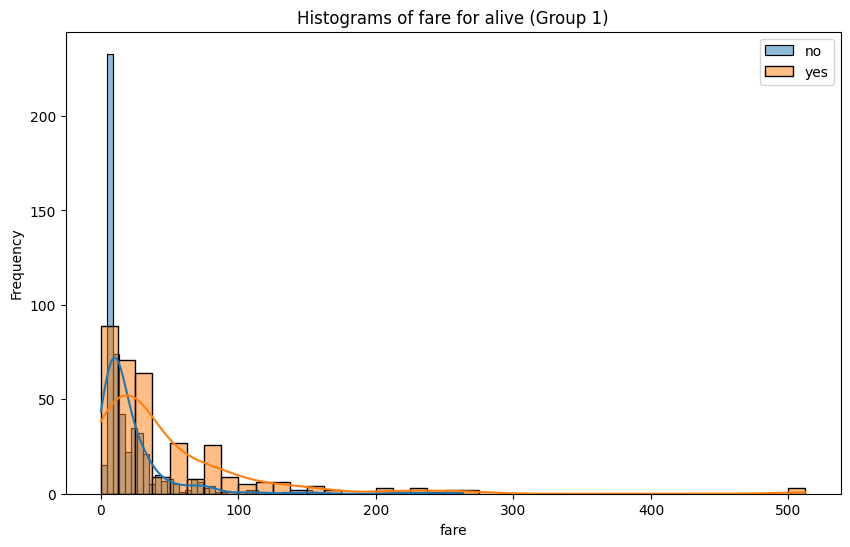

In [1126]:
plot_grouped_histograms(df_titanic,"alive", "fare",2)

In [1127]:
from scipy.stats import mannwhitneyu

In [1128]:
grupo_a = df_titanic.loc[df_titanic.alive == "yes"]["fare"]
grupo_b = df_titanic.loc[df_titanic.alive == "no"]["fare"]

In [1129]:
u_stat, p_valor = mannwhitneyu(grupo_a, grupo_b)

print("Estadístico U:", u_stat)
print("Valor p:", p_valor)

Estadístico U: 129951.5
Valor p: 4.553477179250237e-22


* Relación significativa confirmada entre el precio del billete y la supervivencia, el valor p está en notación científica, el valor es pequeñísimo.

In [1130]:
cero = df_titanic["fare"] == 0.0000
cuantos_zeros = cero.sum()
cuantos_zeros

np.int64(15)

In [1131]:
cero = df_titanic["fare"] == 0.0000
cero = df_titanic[cero]
cero.head(15)

,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone,family_member
179,male,36.000000,0,0,0.0,Third,man,True,Southampton,no,True,0
263,male,40.000000,0,0,0.0,First,man,True,Southampton,no,True,0
271,male,25.000000,0,0,0.0,Third,man,True,Southampton,yes,True,0
277,male,29.699118,0,0,0.0,Second,man,True,Southampton,no,True,0
302,male,19.000000,0,0,0.0,Third,man,True,Southampton,no,True,0
413,male,29.699118,0,0,0.0,Second,man,True,Southampton,no,True,0
466,male,29.699118,0,0,0.0,Second,man,True,Southampton,no,True,0
481,male,29.699118,0,0,0.0,Second,man,True,Southampton,no,True,0
597,male,49.000000,0,0,0.0,Third,man,True,Southampton,no,True,0
633,male,29.699118,0,0,0.0,First,man,True,Southampton,no,True,0


* Todas las personas (excepto una) que no pagaron billete no sobrevivieron. Todos eran hombres, con una edad comprendida entre los 19 y 49 años de edad, embarcaron desde Southampton (seguramente partía desde esta ciudad). Iban solos. Posiblemente eran parte de la tripulación.

In [1132]:
df_titanic["alive_num"] = 0
df_titanic.loc[df_titanic["alive"] == "no", "alive_num"] = 1
df_titanic

,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone,family_member,alive_num
0,male,22.000000,1,0,7.2500,Third,man,True,Southampton,no,False,1,1
1,female,38.000000,1,0,71.2833,First,woman,False,Cherbourg,yes,False,1,0
2,female,26.000000,0,0,7.9250,Third,woman,False,Southampton,yes,True,0,0
3,female,35.000000,1,0,53.1000,First,woman,False,Southampton,yes,False,1,0
4,male,35.000000,0,0,8.0500,Third,man,True,Southampton,no,True,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,male,27.000000,0,0,13.0000,Second,man,True,Southampton,no,True,0,1
887,female,19.000000,0,0,30.0000,First,woman,False,Southampton,yes,True,0,0
888,female,29.699118,1,2,23.4500,Third,woman,False,Southampton,no,False,3,1
889,male,26.000000,0,0,30.0000,First,man,True,Cherbourg,yes,True,0,0


In [1133]:
mean_fare_town = df_titanic.groupby("embark_town")["fare"].mean()
mean_fare_town

embark_town
Cherbourg      59.954144
Queenstown     13.276030
Southampton    27.243651
Name: fare, dtype: float64

In [1134]:
media_fare_por_embark_town_alive = df_titanic.groupby(['embark_town', 'alive'])['fare'].mean().reset_index()
media_fare_por_embark_town_alive

,embark_town,alive,fare
0,Cherbourg,no,35.443335
1,Cherbourg,yes,79.720926
2,Queenstown,no,13.335904
3,Queenstown,yes,13.182227
4,Southampton,no,20.743987
5,Southampton,yes,39.916514


In [1135]:
grupos = df_titanic['embark_town'].unique()  # Obtener los valores únicos de la columna categórica, en este caso la compañía área
fare_por_town = [df_titanic[df_titanic['embark_town'] == grupo]['fare'] for grupo in grupos] # obtenemos los ingresos por compañía y los incluimos en una lista
fare_por_town

[0       7.2500
 2       7.9250
 3      53.1000
 4       8.0500
 6      51.8625
         ...   
 883    10.5000
 884     7.0500
 886    13.0000
 887    30.0000
 888    23.4500
 Name: fare, Length: 646, dtype: float64,
 1      71.2833
 9      30.0708
 19      7.2250
 26      7.2250
 30     27.7208
         ...   
 866    13.8583
 874    24.0000
 875     7.2250
 879    83.1583
 889    30.0000
 Name: fare, Length: 168, dtype: float64,
 5       8.4583
 16     29.1250
 22      8.0292
 28      7.8792
 32      7.7500
         ...   
 790     7.7500
 825     6.9500
 828     7.7500
 885    29.1250
 890     7.7500
 Name: fare, Length: 77, dtype: float64]

In [1136]:
from scipy import stats

f_val, p_val = stats.f_oneway(*fare_por_town)
                                               
print("Valor F:", f_val)
print("Valor p:", p_val)

Valor F: 37.90071879449554
Valor p: 1.6027870913034332e-16


In [1137]:
df_c= df_titanic[df_titanic["embark_town"] == "Cherbourg"]
df_s = df_titanic[df_titanic["embark_town"] == "Southampton"]
df_q = df_titanic[df_titanic["embark_town"] == "Queenstown"]

CHERBOURG


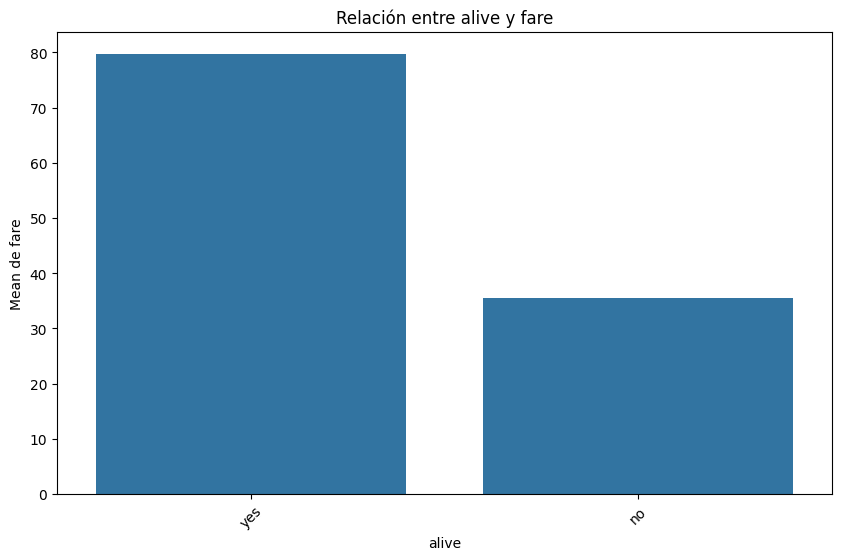

In [1138]:
print("CHERBOURG")
plot_categorical_numerical_relationship(df_c, "alive", "fare")

SOUTHAMPTON


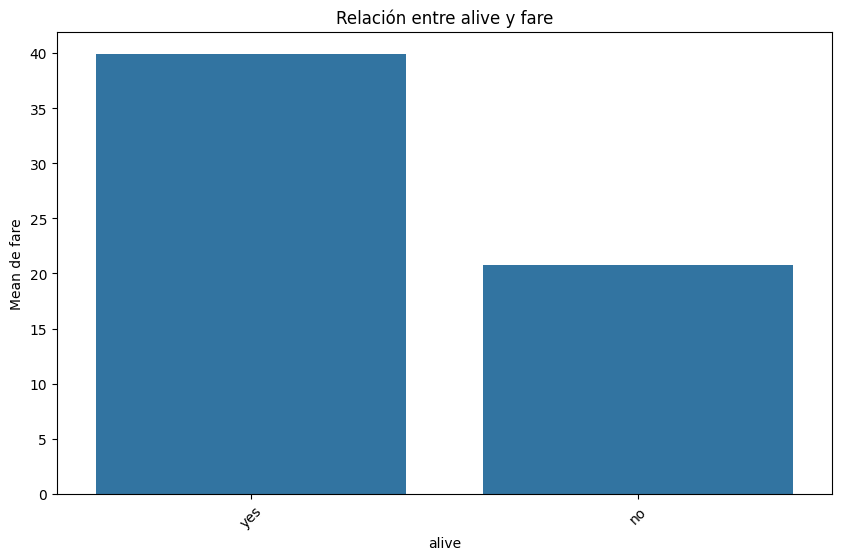

In [1139]:
print("SOUTHAMPTON")
plot_categorical_numerical_relationship(df_s, "alive", "fare")

QUEENSTOWN


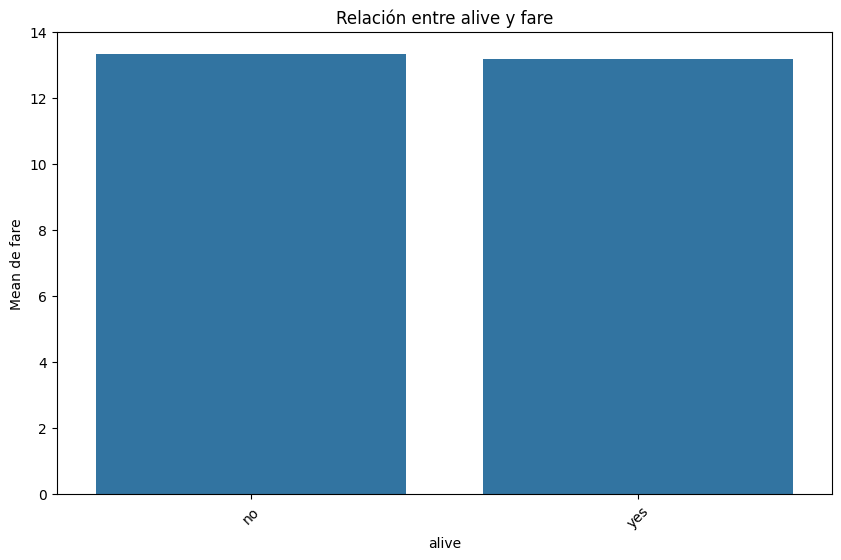

In [1140]:
print("QUEENSTOWN")
plot_categorical_numerical_relationship(df_q, "alive", "fare")

In [1141]:
df_yes = df_titanic[df_titanic["alive"] == "yes"]
df_no = df_titanic[df_titanic["alive"] == "no"]

Para el YES


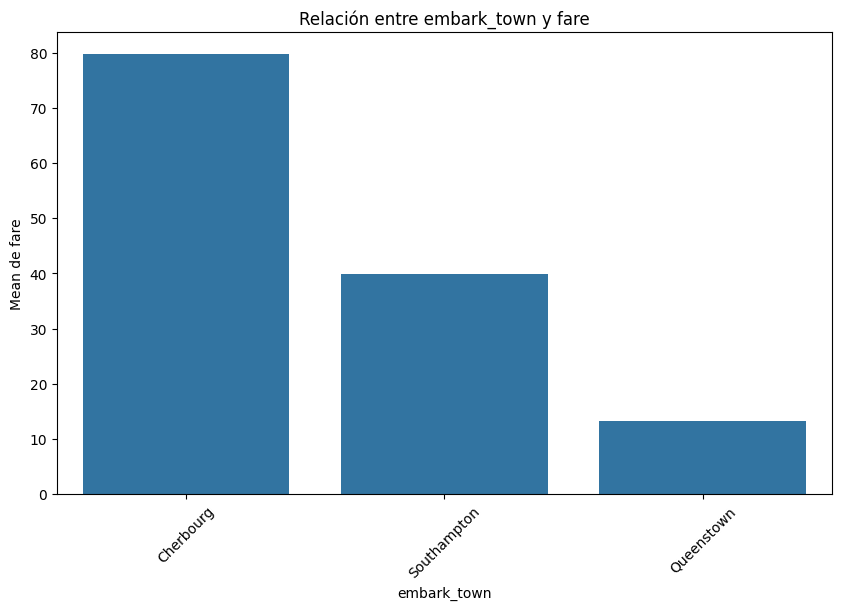

In [1142]:
print("Para el YES")
plot_categorical_numerical_relationship(df_yes, "embark_town", "fare")

Para el NO


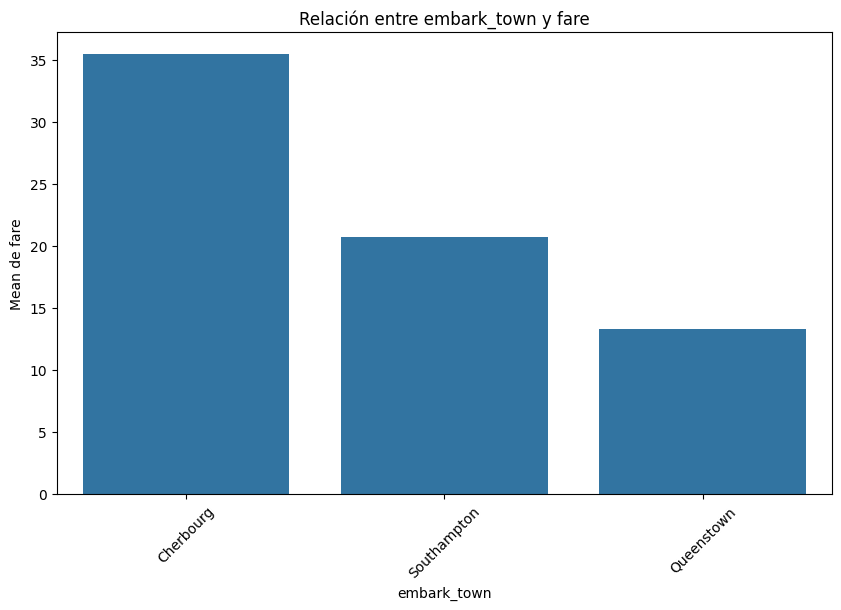

In [1143]:
print("Para el NO")
plot_categorical_numerical_relationship(df_no, "embark_town", "fare")

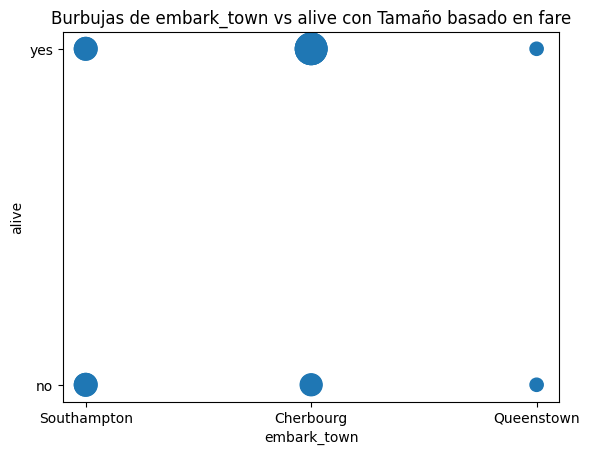

In [1144]:
bubble_plot(df_titanic,"embark_town","alive","fare", scale = 1)

* Podemos ver que en Cherbourg se paga más por los billetes (fare más alto, burbuja más grande) y que también hay una mayor tasa de supervivencia (con más personas supervivientes de esa ciudad, en el yes). 
* Cherbourg, como hipótesis, tendría un nivel socioeconómico más alto que las otras ciudades, y más gente rica a bordo.
* Al pagar más por el billete, es más probable que viajen en primera clase, las posiciones para la evacuación estarían mejor ubicadas y, por tanto, mayor probabilidad de supervivencia.
* Aunque esto sería más propio de la clase como tal, que del precio del billete.

Para el YES (alive)


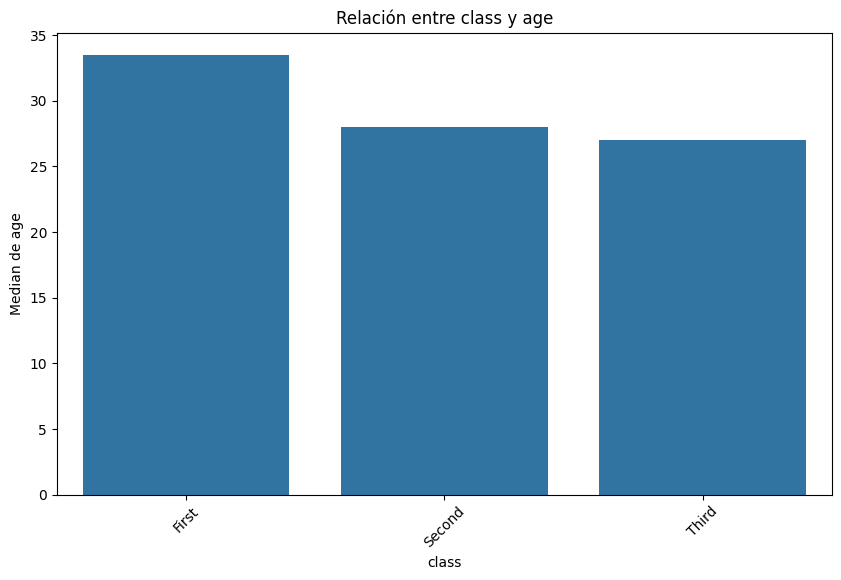

In [1145]:
print("Para el YES (alive)")
plot_categorical_numerical_relationship(df_yes,"class","age", measure = "median")

Para el NO (alive)


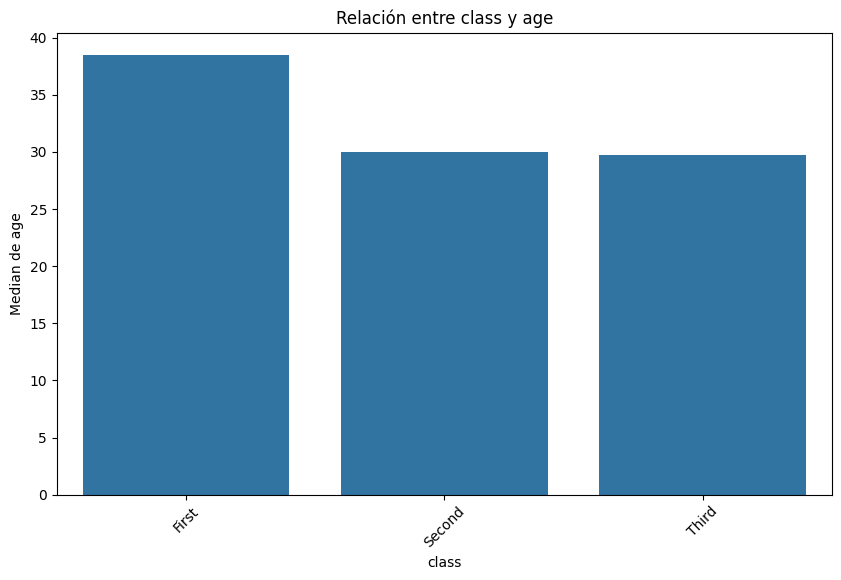

In [1146]:
print("Para el NO (alive)")
plot_categorical_numerical_relationship(df_no,"class","age", measure = "median")

Para el YES (alive)


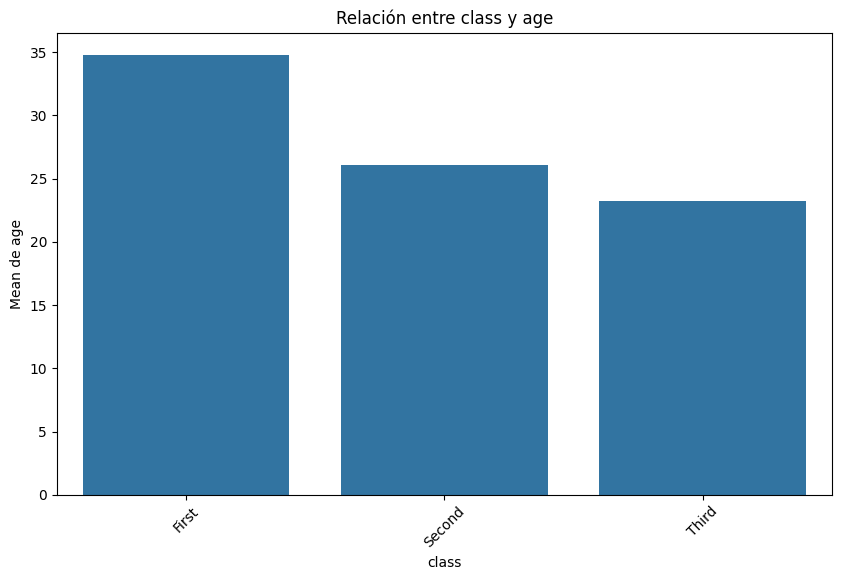

In [1147]:
print("Para el YES (alive)")
plot_categorical_numerical_relationship(df_yes, "class", "age")

Para el NO (dead)


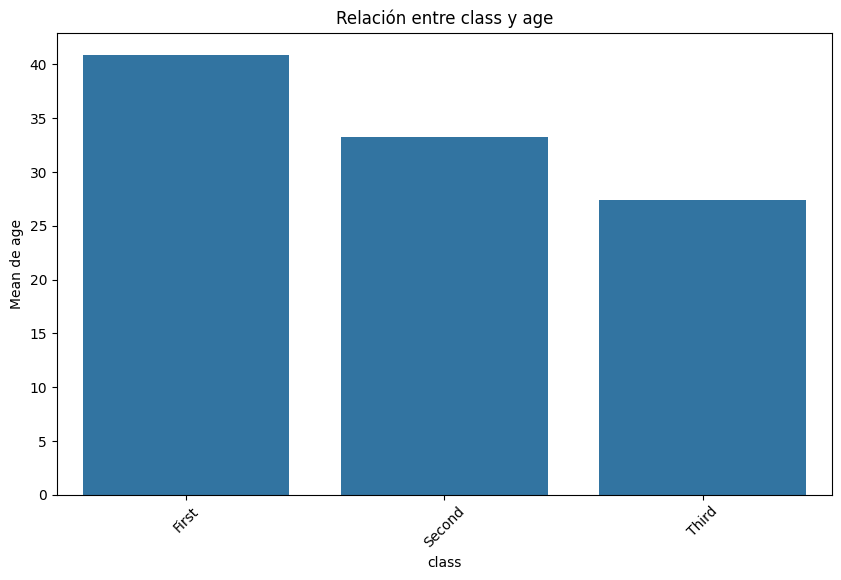

In [1148]:
print("Para el NO (dead)")
plot_categorical_numerical_relationship(df_no, "class", "age")

YES


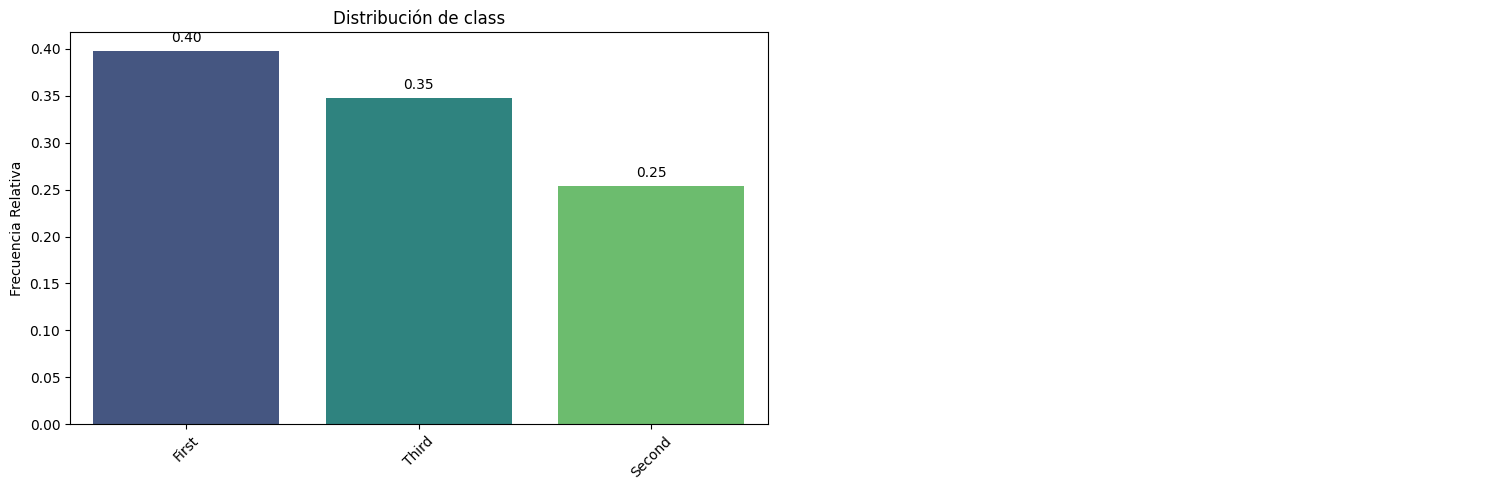

In [1149]:
print("YES")
pinta_distribucion_categoricas(df_yes,["class"], relativa=True, mostrar_valores=True)


NO


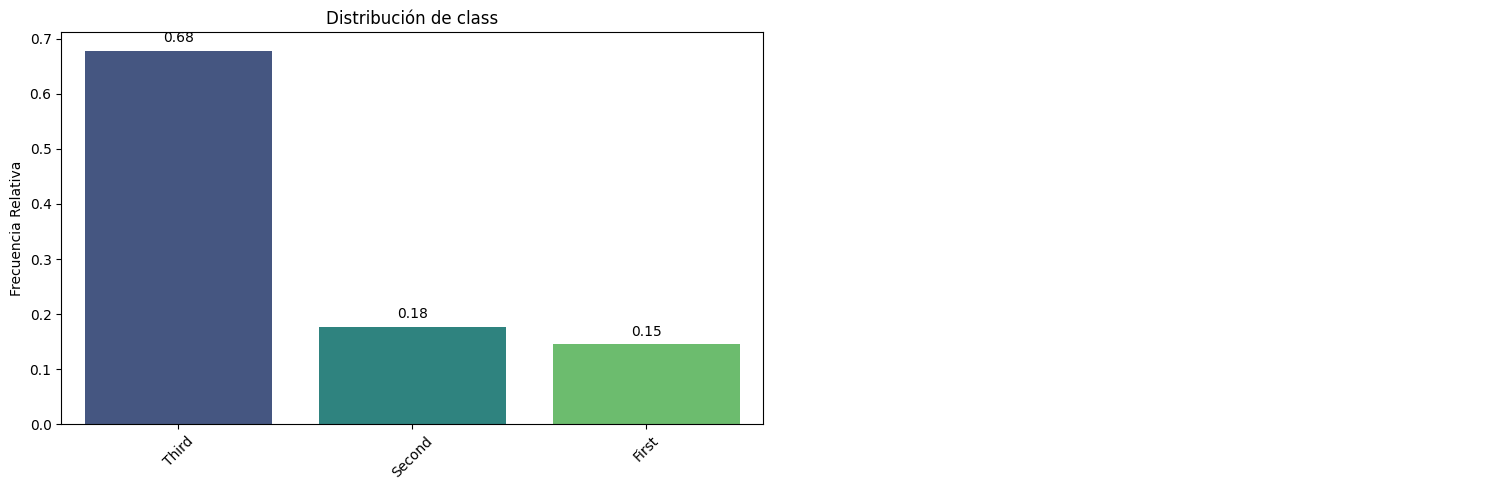

In [1150]:
print("NO")
pinta_distribucion_categoricas(df_no,["class"], relativa=True, mostrar_valores=True)


In [1151]:
df_yes.groupby("class", as_index = False)["age"].mean().value_counts(normalize = True)

class   age      
First   34.784615    0.333333
Second  26.076166    0.333333
Third   23.232689    0.333333
Name: proportion, dtype: float64

In [1152]:
df_no.groupby("class", as_index = False)["age"].mean().value_counts(normalize = True)

class   age      
First   40.896074    0.333333
Second  33.266947    0.333333
Third   27.417500    0.333333
Name: proportion, dtype: float64

In [1153]:
df_yes.groupby("class", as_index = False)["age"].mean()

,class,age
0,First,34.784615
1,Second,26.076166
2,Third,23.232689


In [1154]:
df_no.groupby("class", as_index = False)["age"].mean()

,class,age
0,First,40.896074
1,Second,33.266947
2,Third,27.417500


In [1155]:
df_titanic["grupo_edad"] = pd.cut(df_titanic["age"],bins=[0, 12, 18, 30, 50, 100],labels=["Niños", "Adolescentes", "Jovenes", "Adultos", "Mayores"])
df_titanic

,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone,family_member,alive_num,grupo_edad
0,male,22.000000,1,0,7.2500,Third,man,True,Southampton,no,False,1,1,Jovenes
1,female,38.000000,1,0,71.2833,First,woman,False,Cherbourg,yes,False,1,0,Adultos
2,female,26.000000,0,0,7.9250,Third,woman,False,Southampton,yes,True,0,0,Jovenes
3,female,35.000000,1,0,53.1000,First,woman,False,Southampton,yes,False,1,0,Adultos
4,male,35.000000,0,0,8.0500,Third,man,True,Southampton,no,True,0,1,Adultos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,male,27.000000,0,0,13.0000,Second,man,True,Southampton,no,True,0,1,Jovenes
887,female,19.000000,0,0,30.0000,First,woman,False,Southampton,yes,True,0,0,Jovenes
888,female,29.699118,1,2,23.4500,Third,woman,False,Southampton,no,False,3,1,Jovenes
889,male,26.000000,0,0,30.0000,First,man,True,Cherbourg,yes,True,0,0,Jovenes


In [1156]:
#YES absoluto
clase_edad_absoluto = df_titanic[df_titanic["alive"] == "yes"].groupby(["class", "grupo_edad"]).size()
clase_edad_absoluto

C:\Users\User\AppData\Local\Temp\ipykernel_26360\3586544965.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  clase_edad_absoluto = df_titanic[df_titanic["alive"] == "yes"].groupby(["class", "grupo_edad"]).size()


class   grupo_edad  
First   Niños            3
        Adolescentes    11
        Jovenes         46
        Adultos         58
        Mayores         18
Second  Niños           17
        Adolescentes     6
        Jovenes         32
        Adultos         29
        Mayores          3
Third   Niños           20
        Adolescentes    13
        Jovenes         70
        Adultos         15
        Mayores          1
dtype: int64

In [1157]:
#YES relativo
clase_edad_total = df_titanic.groupby(["class", "grupo_edad"]).size()
clase_edad_absoluto = df_titanic[df_titanic["alive"] == "yes"].groupby(["class", "grupo_edad"]).size()
clase_edad_relativo = clase_edad_absoluto / clase_edad_total
clase_edad_relativo

C:\Users\User\AppData\Local\Temp\ipykernel_26360\1207998115.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  clase_edad_total = df_titanic.groupby(["class", "grupo_edad"]).size()
C:\Users\User\AppData\Local\Temp\ipykernel_26360\1207998115.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  clase_edad_absoluto = df_titanic[df_titanic["alive"] == "yes"].groupby(["class", "grupo_edad"]).size()


class   grupo_edad  
First   Niños           0.750000
        Adolescentes    0.916667
        Jovenes         0.613333
        Adultos         0.674419
        Mayores         0.461538
Second  Niños           1.000000
        Adolescentes    0.500000
        Jovenes         0.410256
        Adultos         0.467742
        Mayores         0.200000
Third   Niños           0.416667
        Adolescentes    0.282609
        Jovenes         0.238095
        Adultos         0.161290
        Mayores         0.100000
dtype: float64

In [1158]:
#NO absoluto
clase_edad_absoluto = df_titanic[df_titanic["alive"] == "no"].groupby(["class", "grupo_edad"]).size()
clase_edad_absoluto

C:\Users\User\AppData\Local\Temp\ipykernel_26360\3865358489.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  clase_edad_absoluto = df_titanic[df_titanic["alive"] == "no"].groupby(["class", "grupo_edad"]).size()


class   grupo_edad  
First   Niños             1
        Adolescentes      1
        Jovenes          29
        Adultos          28
        Mayores          21
Second  Niños             0
        Adolescentes      6
        Jovenes          46
        Adultos          33
        Mayores          12
Third   Niños            28
        Adolescentes     33
        Jovenes         224
        Adultos          78
        Mayores           9
dtype: int64

In [1159]:
#NO relativo
clase_edad_total = df_titanic.groupby(["class", "grupo_edad"]).size()
clase_edad_absoluto = df_titanic[df_titanic["alive"] == "no"].groupby(["class", "grupo_edad"]).size()
clase_edad_relativo = clase_edad_absoluto / clase_edad_total
clase_edad_relativo

C:\Users\User\AppData\Local\Temp\ipykernel_26360\2192735871.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  clase_edad_total = df_titanic.groupby(["class", "grupo_edad"]).size()
C:\Users\User\AppData\Local\Temp\ipykernel_26360\2192735871.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  clase_edad_absoluto = df_titanic[df_titanic["alive"] == "no"].groupby(["class", "grupo_edad"]).size()


class   grupo_edad  
First   Niños           0.250000
        Adolescentes    0.083333
        Jovenes         0.386667
        Adultos         0.325581
        Mayores         0.538462
Second  Niños           0.000000
        Adolescentes    0.500000
        Jovenes         0.589744
        Adultos         0.532258
        Mayores         0.800000
Third   Niños           0.583333
        Adolescentes    0.717391
        Jovenes         0.761905
        Adultos         0.838710
        Mayores         0.900000
dtype: float64

* Podemos ver cómo cuanto más joven, y de primera clase, tendrás más probrabildiades de salvarte.
* Si eres más mayor, y addemás de clase más baja, tienes más probabilidades de no sobrevivir
* Los más mayores tienen más probabilidades de morir en cualquera de las clases
* Los niños tienen más probabildiades de sobrevivir en cualquiera de las clases


(3, 2)


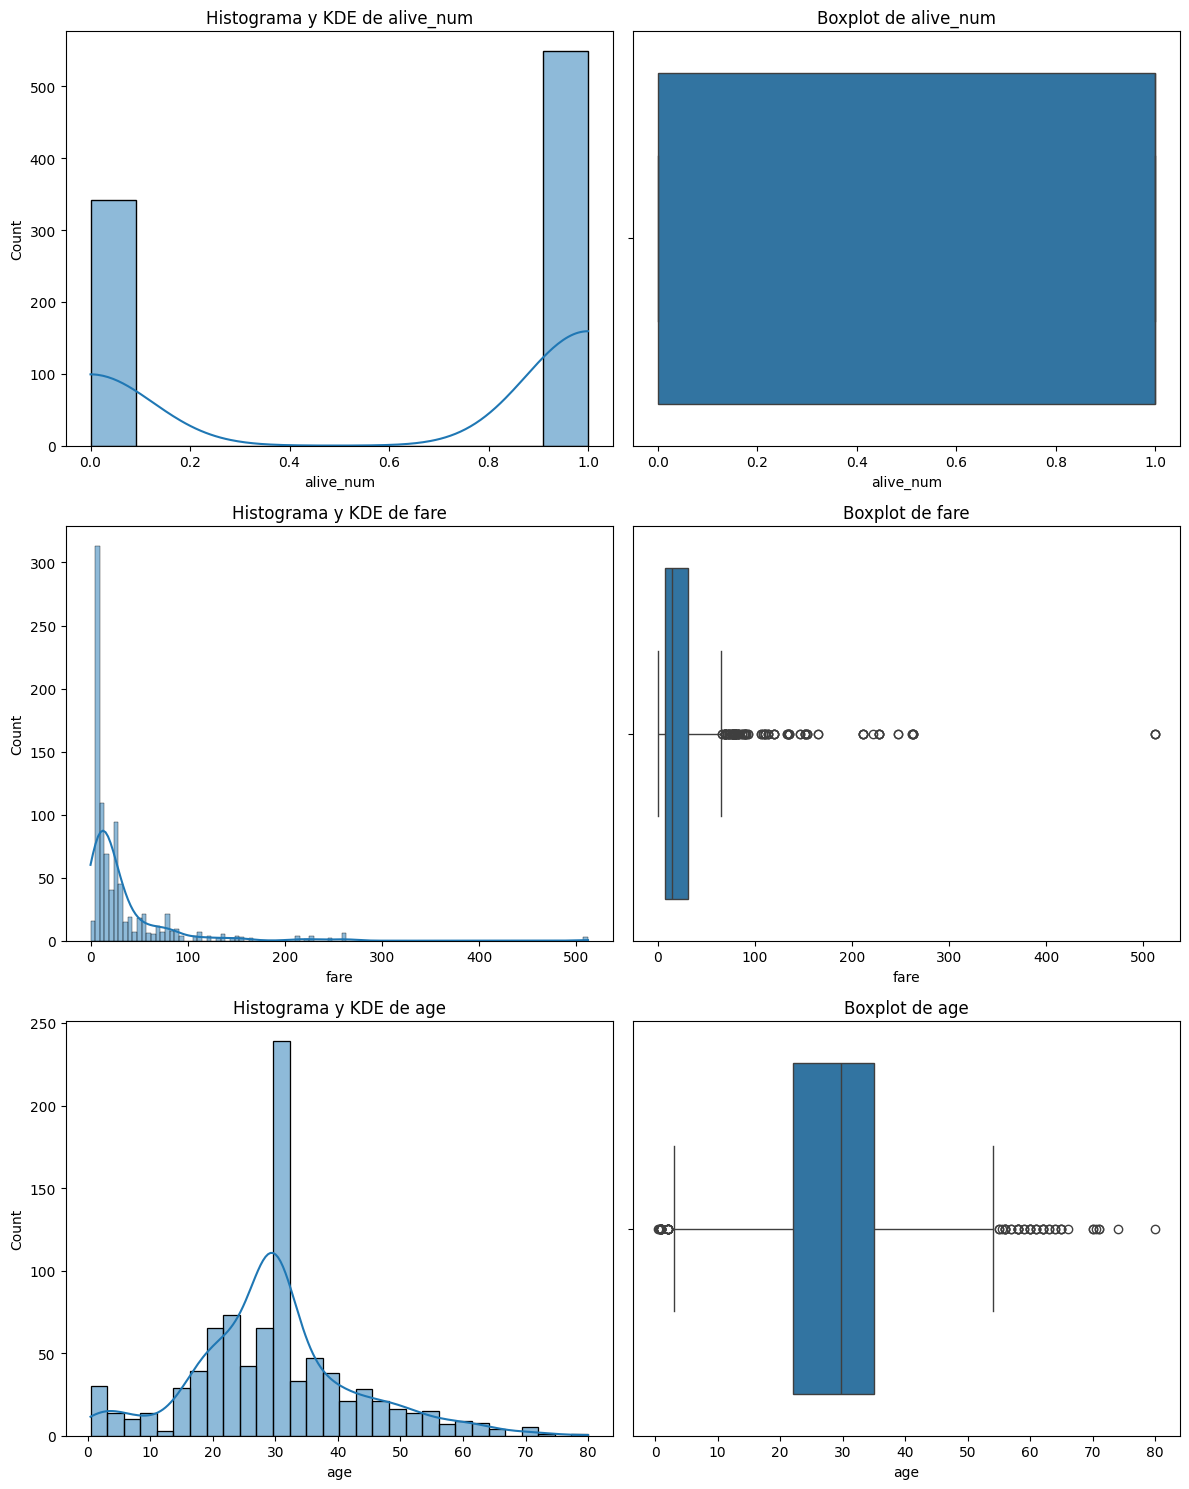

In [1160]:
plot_combined_graphs(df_titanic,["alive_num","fare","age"])

Para YES (alive):


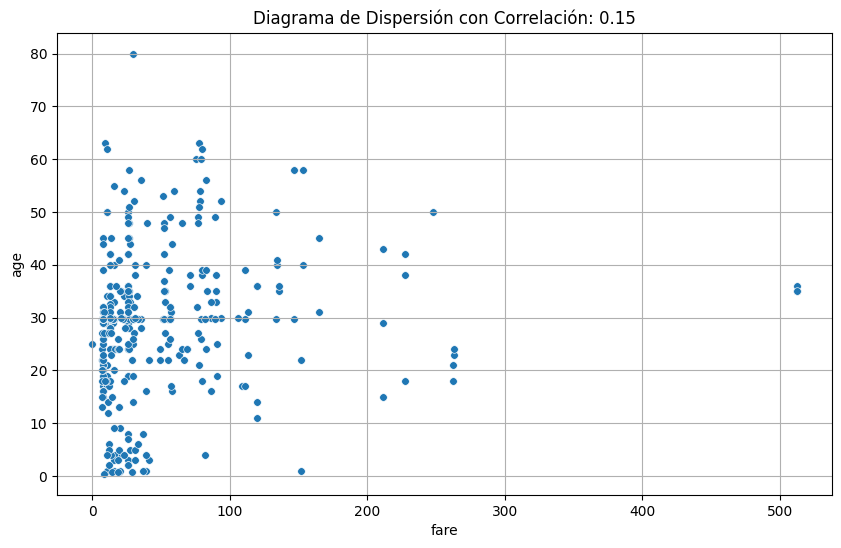

In [1161]:
print("Para YES (alive):")
grafico_dispersion_con_correlacion(df_yes,"fare", "age", mostrar_correlacion= True, tamano_puntos= 30)

Para NO (dead):


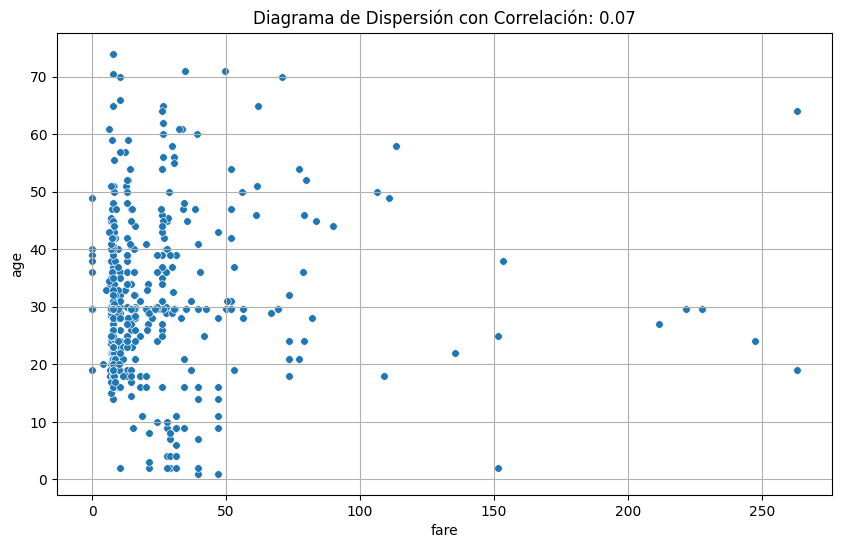

In [1162]:
print("Para NO (dead):")
grafico_dispersion_con_correlacion(df_no,"fare", "age", mostrar_correlacion= True, tamano_puntos= 30)

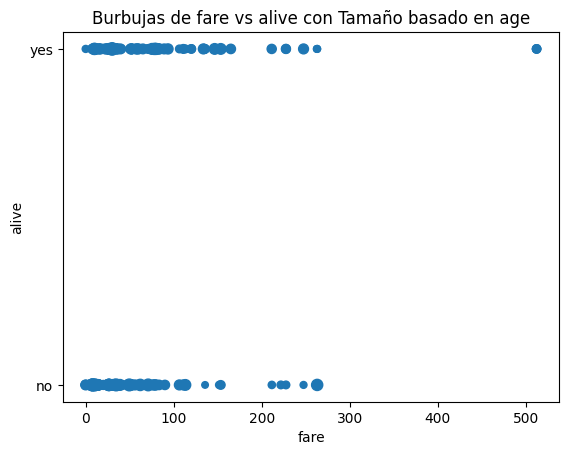

In [1163]:
bubble_plot(df_titanic,"fare","alive","age", scale = 1)

* Podemos observar que a más edad, y menor coste del billete, menos probabilidades de sobrevivir.
* A menor edad, y mayor coste del billete, más probabilidades de sobrevivir.
* Es decir, si eres joven y de clase alta, probablemente sobrevivirás. Si eres mayor, de clase baja, probablemente morirás.

## #2 Viajes

El objetivo en este caso no es tanto hacer un montón de análisis sino de completar lo que quedó pendiente en el workout y de entender cómo de un dataset podemos obtener preguntas o hipótesis interesantes (si las hay)

### #2.1 

Carga el dataset de viajes del mes de junio. Repite el análisis bivariante entre las variables "Aircompany" e "Ingresos", mostrando previamente los viajes por compañía aérea. ¿Qué situación llamativa nos surgió? (Ten en cuenta que somos el departamenteo de DataScience de TabarAir)

In [1164]:
df_air_jun = pd.read_csv("./data/dataset_viajes_jun.csv")

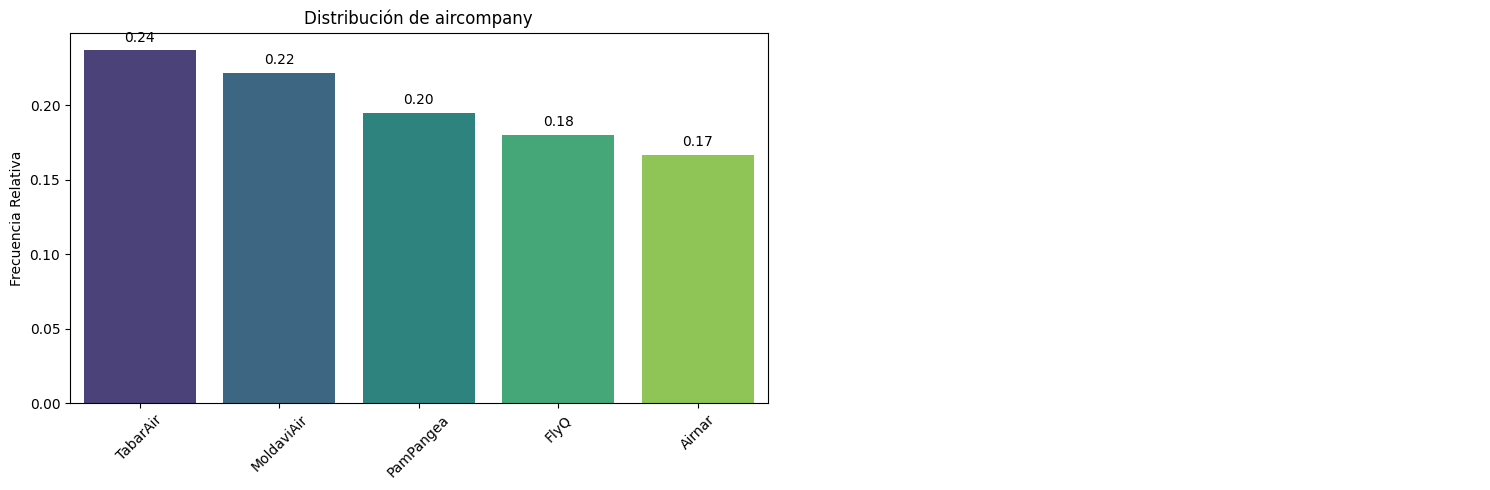

In [1165]:
pinta_distribucion_categoricas(df_air_jun,["aircompany"], relativa= True, mostrar_valores= True)

(2,)


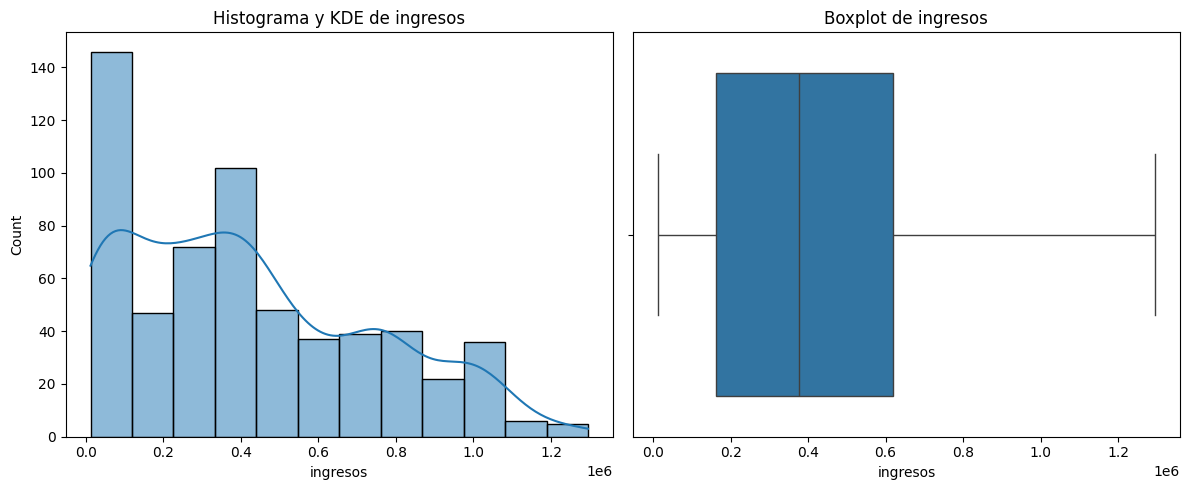

In [1166]:
plot_combined_graphs(df_air_jun,["ingresos"])

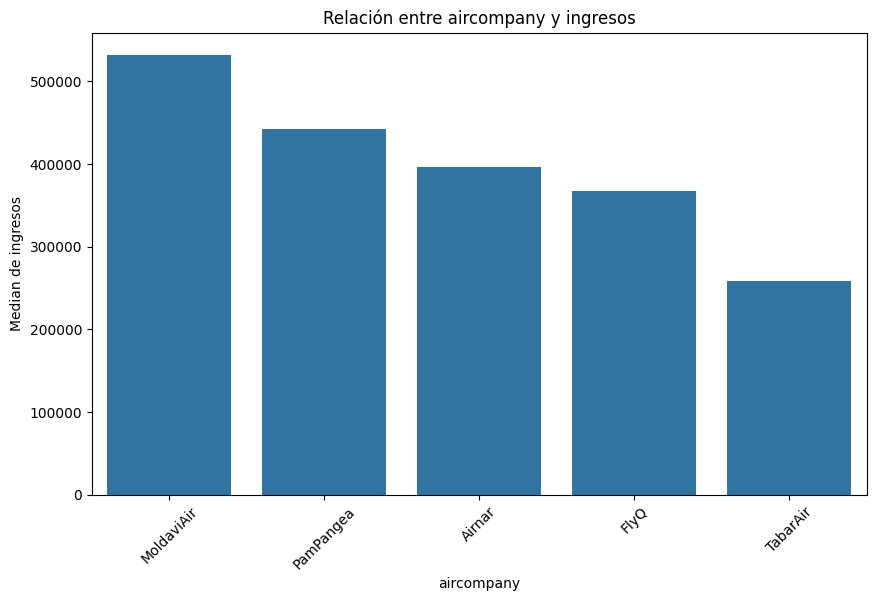

In [1167]:
plot_categorical_numerical_relationship(df_air_jun, "aircompany","ingresos",measure="median")

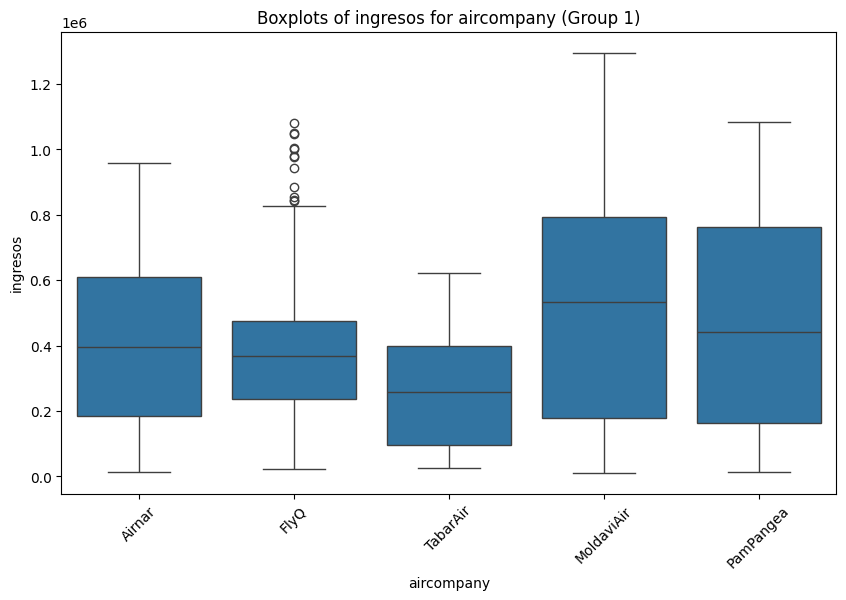

In [1168]:
plot_grouped_boxplots(df_air_jun,"aircompany","ingresos")

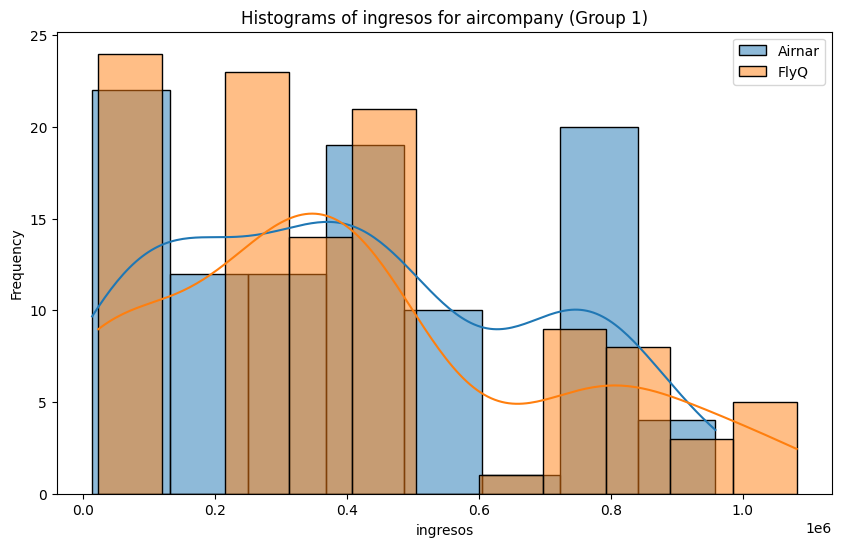

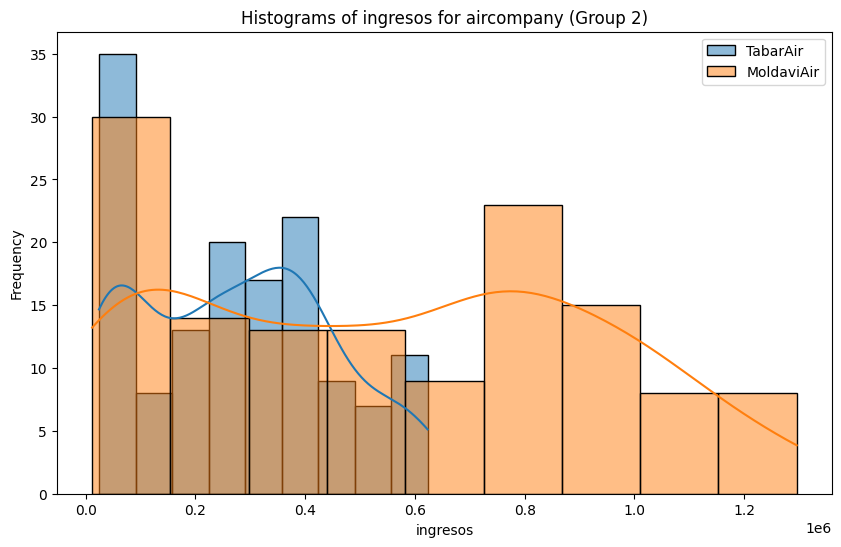

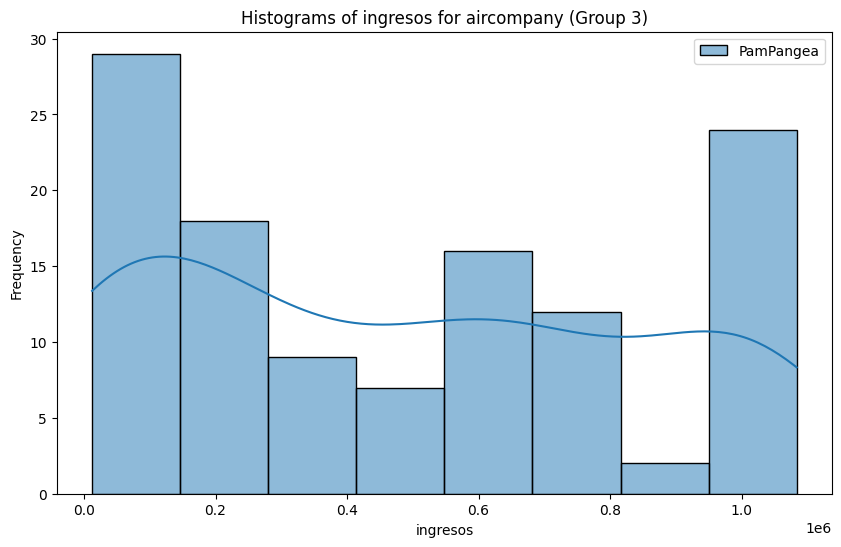

In [1169]:
plot_grouped_histograms(df_air_jun,"aircompany", "ingresos", 2)

* Lo curioso es que TabarAir, siendo la empresa con mayor número de vuelos, tiene los menores ingresos.
* Además, hay que fijarse en la eficiencia

### #2.2

Repite el análisis multivariante entre "ingresos","distancias" y "consumo_kg". ¿Qué veíamos que parecía también muy prometedor?

(2,)


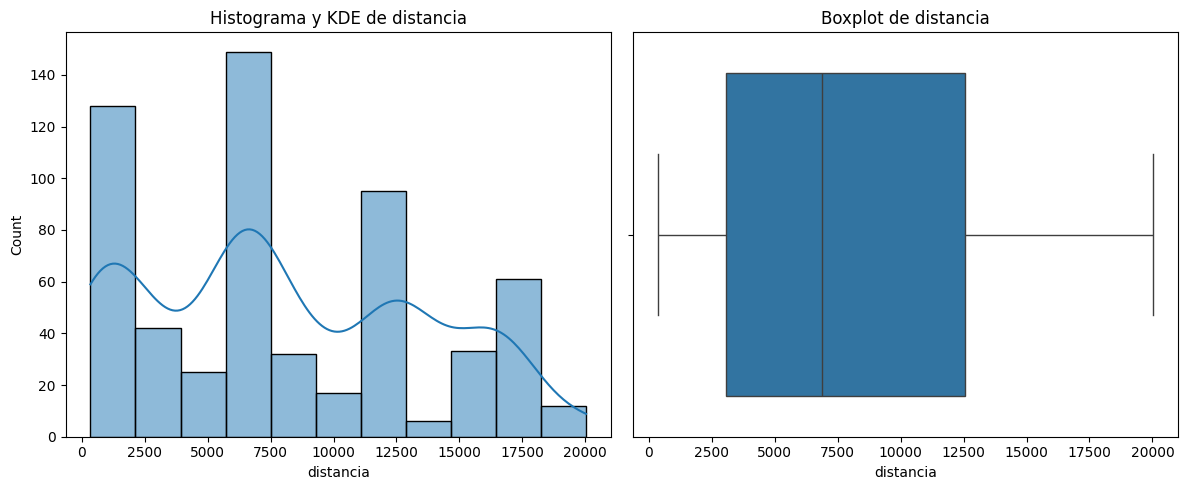

In [1170]:
plot_combined_graphs(df_air_jun,["distancia"])

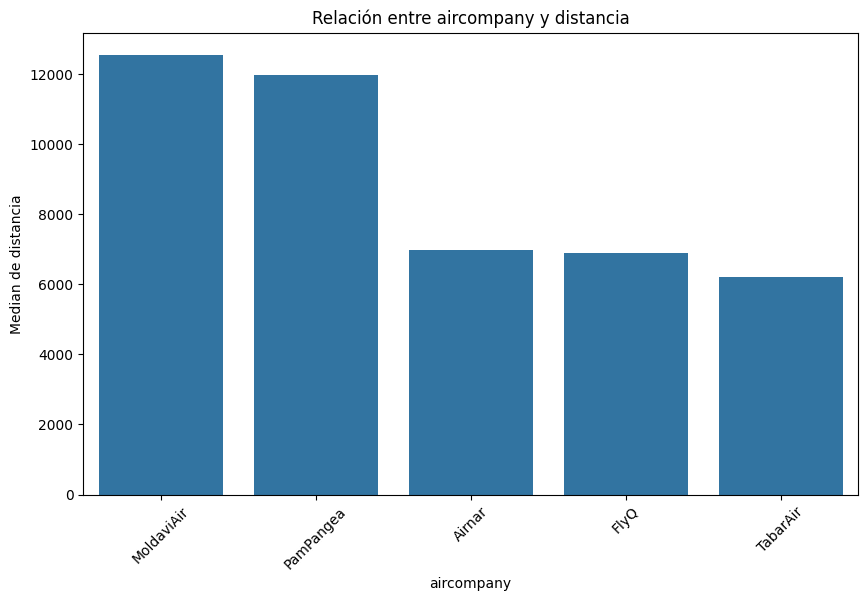

In [1171]:
plot_categorical_numerical_relationship(df_air_jun, "aircompany","distancia",measure="median") # Utilizando mediana

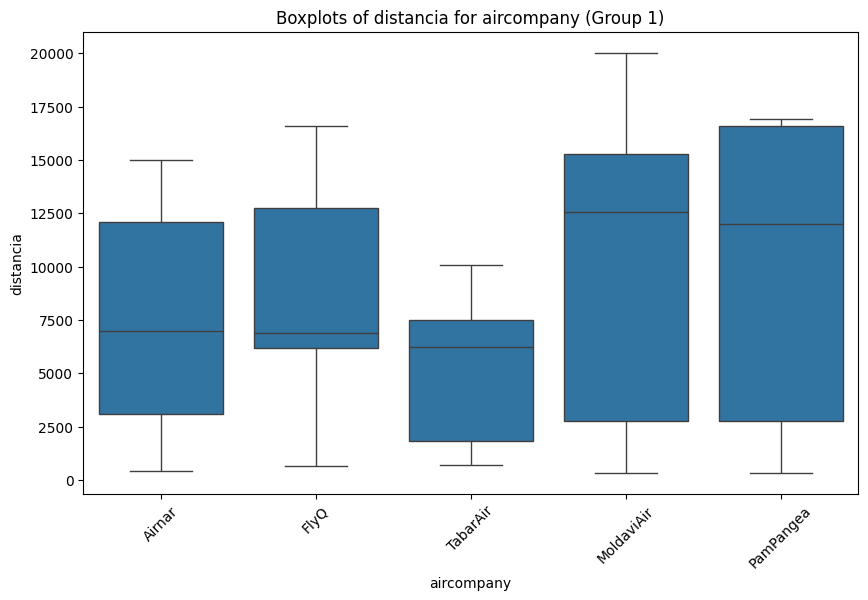

In [1172]:
plot_grouped_boxplots(df_air_jun,"aircompany","distancia")

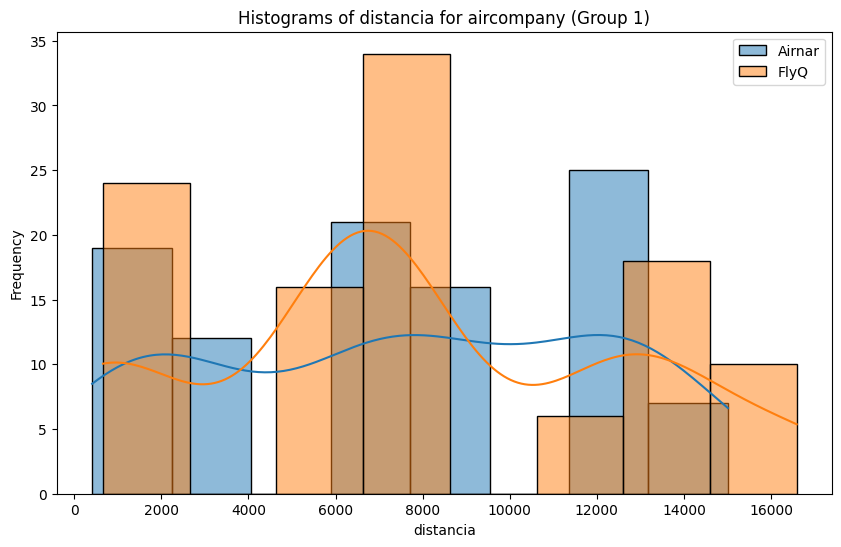

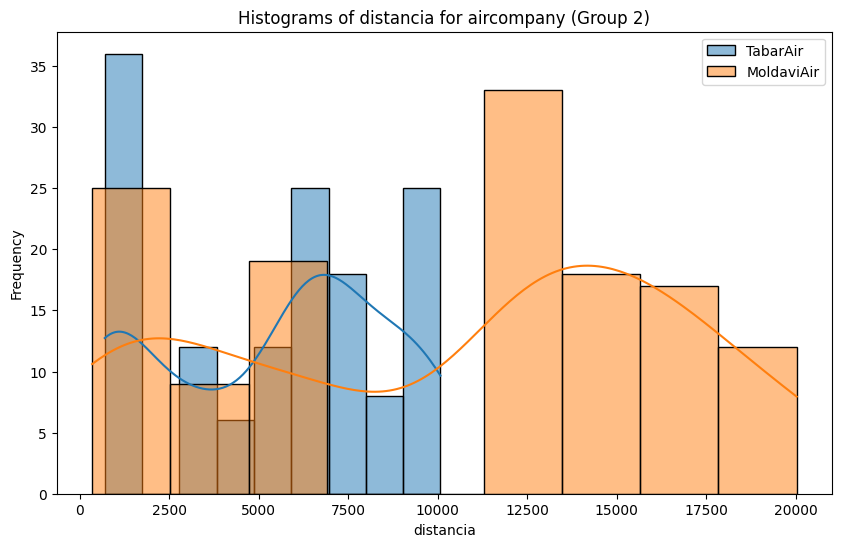

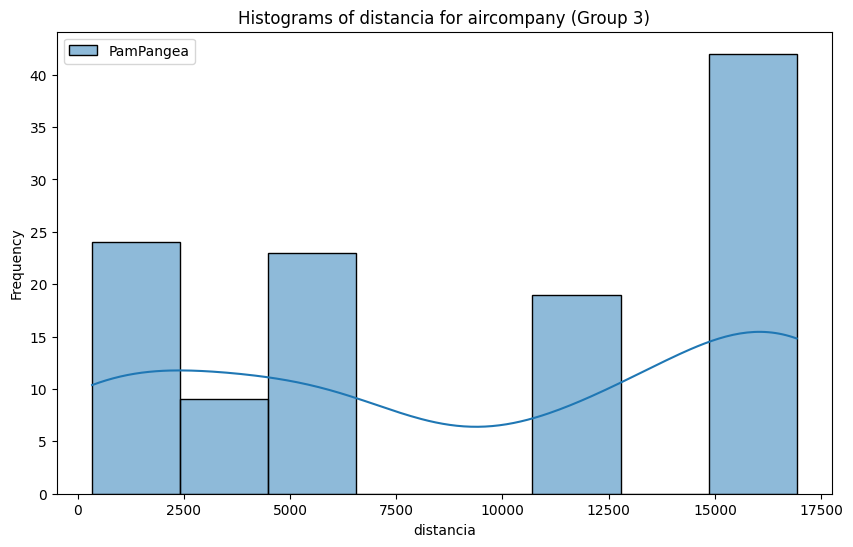

In [1173]:
plot_grouped_histograms(df_air_jun,"aircompany", "distancia", 2)

* En distancia recorrida, TabarAir también se queda en la cola. 
* No es la que más ingresa, siendo la que más vuelos tiene, peor tampoco es la que más distancia recorre.

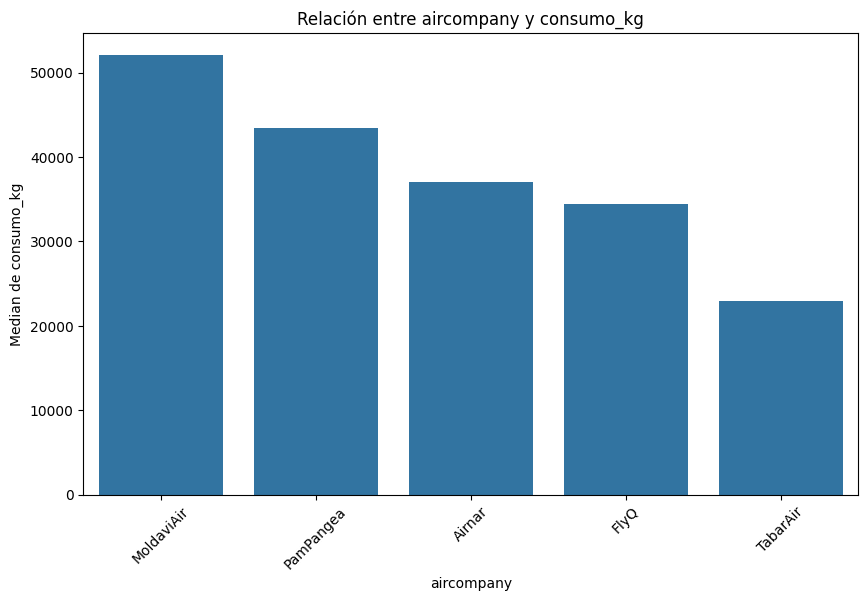

In [1174]:
plot_categorical_numerical_relationship(df_air_jun, "aircompany","consumo_kg",measure="median") # Utilizando mediana

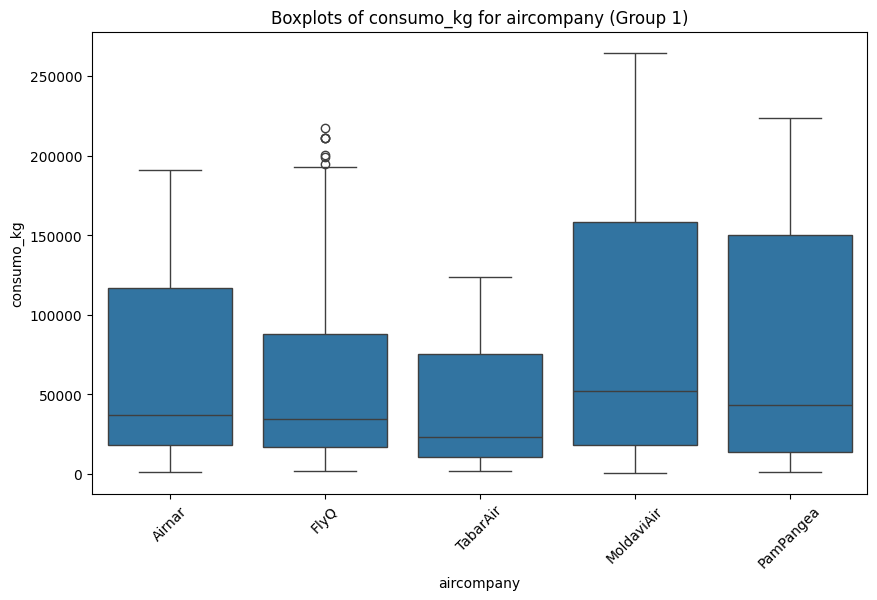

In [1175]:
plot_grouped_boxplots(df_air_jun,"aircompany","consumo_kg")

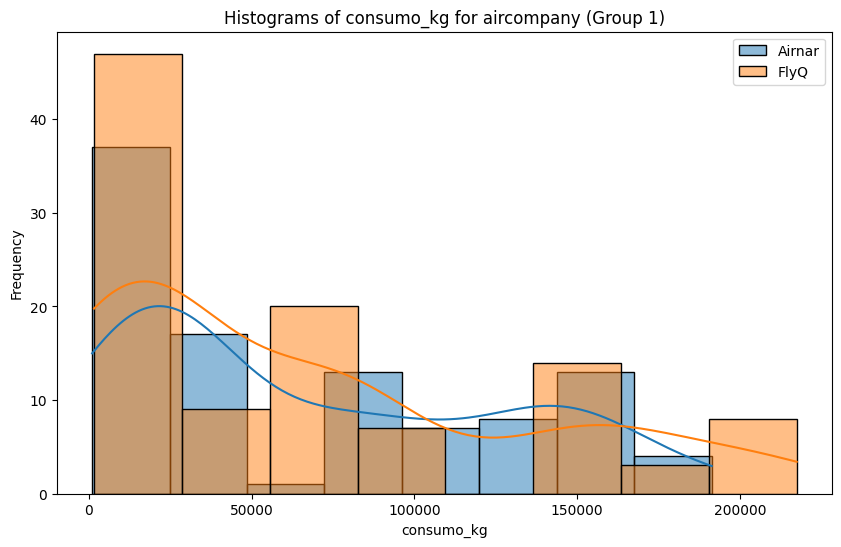

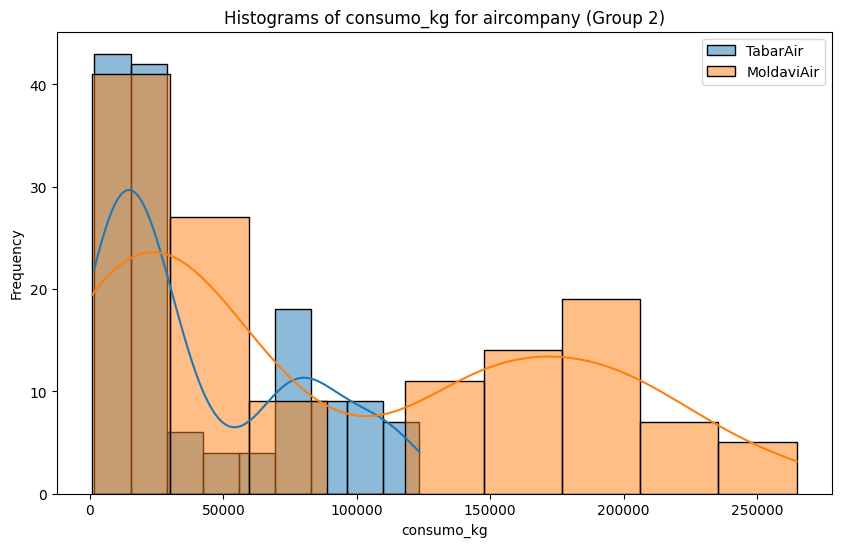

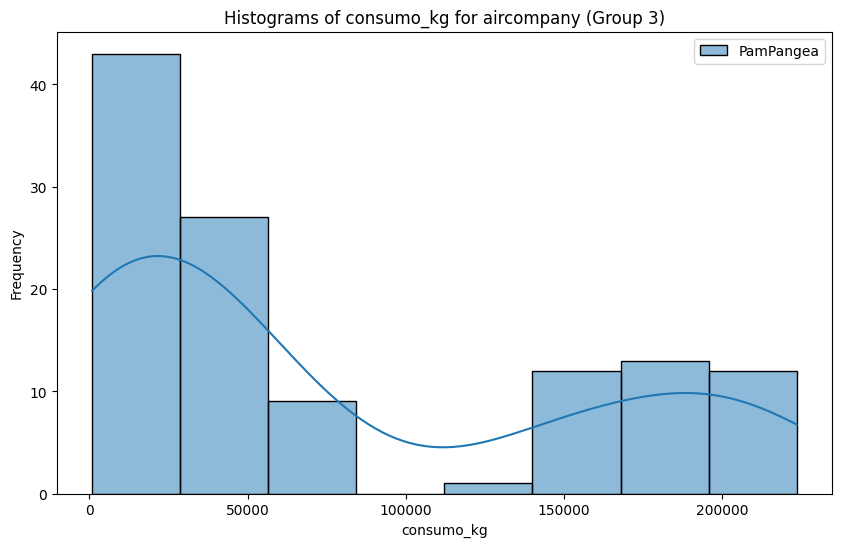

In [1176]:
plot_grouped_histograms(df_air_jun,"aircompany", "consumo_kg", 2)

In [1177]:
df_air_jun["eficiencia"] = df_air_jun["distancia"]/df_air_jun["consumo_kg"]
df_air_jun

,aircompany,origen,destino,distancia,avion,con_escala,consumo_kg,duracion,ingresos,id_vuelo,mes,eficiencia
0,Airnar,París,Ginebra,411,Boeing 737,False,1028.691900,51,14232.65,Air_PaGi_10737,Jun23,0.399537
1,FlyQ,Bali,Roma,12738,Boeing 737,True,33479.132544,1167,468527.19,Fly_BaRo_10737,Jun23,0.380476
2,TabarAir,Ginebra,Los Angeles,9103,Airbus A380,False,109439.907200,626,584789.19,Tab_GiLo_11380,Jun23,0.083178
3,MoldaviAir,París,Cincinnati,6370,Boeing 737,False,17027.010000,503,233342.51,Mol_PaCi_10737,Jun23,0.374111
4,TabarAir,Cincinnati,Roma,7480,Boeing 747,False,86115.744000,518,438535.07,Tab_CiRo_10747,Jun23,0.086860
...,...,...,...,...,...,...,...,...,...,...,...,...
595,PamPangea,Bali,Londres,12553,Boeing 737,True,33310.138680,1153,442668.52,Pam_BaLo_10737,Jun23,0.376852
596,Airnar,Cádiz,París,1447,Airbus A380,False,17229.139600,116,87307.63,Air_CaPa_11380,Jun23,0.083986
597,Airnar,Los Angeles,Cádiz,9373,Boeing 737,False,23231.917800,731,339943.47,Air_LoCa_10737,Jun23,0.403454
598,FlyQ,Barcelona,Bali,13058,Boeing 747,True,144766.211200,1070,752212.98,Fly_BaBa_10747,Jun23,0.090201


In [1178]:
df_air_jun["eficiencia"].describe()

count    600.000000
mean       0.208880
std        0.145831
min        0.075616
25%        0.083986
50%        0.090201
75%        0.375855
max        0.411523
Name: eficiencia, dtype: float64

In [1179]:
df_air_jun.groupby("aircompany")["eficiencia"].mean()

aircompany
Airnar        0.182445
FlyQ          0.211046
MoldaviAir    0.200001
PamPangea     0.228572
TabarAir      0.217939
Name: eficiencia, dtype: float64

* En la relación entre la distancia y el consumo, es decir, la eficiencia, TabarAir tampoco es es la ganadora

### #2.3

Crea una variable categorica "cat_vuelo" a partir de distancias, escoge los rangos de las categorías basándote en la distribución de valores de "distancia" (sugerencia entre 3 y 4 categorías). Extra: Reaiza ahora otra vez el análisis multivariante "cat_vuelo", "ingresos", "consumo_kg". ¿Ves algo diferente?

In [1180]:
percentiles = df_air_jun["distancia"].quantile([0, 0.25, 0.5, 0.75, 1]).values
labels = ["Corta", "Media-baja", "Media-alta", "Larga"]
df_air_jun

,aircompany,origen,destino,distancia,avion,con_escala,consumo_kg,duracion,ingresos,id_vuelo,mes,eficiencia
0,Airnar,París,Ginebra,411,Boeing 737,False,1028.691900,51,14232.65,Air_PaGi_10737,Jun23,0.399537
1,FlyQ,Bali,Roma,12738,Boeing 737,True,33479.132544,1167,468527.19,Fly_BaRo_10737,Jun23,0.380476
2,TabarAir,Ginebra,Los Angeles,9103,Airbus A380,False,109439.907200,626,584789.19,Tab_GiLo_11380,Jun23,0.083178
3,MoldaviAir,París,Cincinnati,6370,Boeing 737,False,17027.010000,503,233342.51,Mol_PaCi_10737,Jun23,0.374111
4,TabarAir,Cincinnati,Roma,7480,Boeing 747,False,86115.744000,518,438535.07,Tab_CiRo_10747,Jun23,0.086860
...,...,...,...,...,...,...,...,...,...,...,...,...
595,PamPangea,Bali,Londres,12553,Boeing 737,True,33310.138680,1153,442668.52,Pam_BaLo_10737,Jun23,0.376852
596,Airnar,Cádiz,París,1447,Airbus A380,False,17229.139600,116,87307.63,Air_CaPa_11380,Jun23,0.083986
597,Airnar,Los Angeles,Cádiz,9373,Boeing 737,False,23231.917800,731,339943.47,Air_LoCa_10737,Jun23,0.403454
598,FlyQ,Barcelona,Bali,13058,Boeing 747,True,144766.211200,1070,752212.98,Fly_BaBa_10747,Jun23,0.090201


In [1181]:
df_air_jun["cat_vuelo"] = pd.cut(df_air_jun["distancia"], bins=percentiles, labels=labels, include_lowest=True)
df_air_jun

,aircompany,origen,destino,distancia,avion,con_escala,consumo_kg,duracion,ingresos,id_vuelo,mes,eficiencia,cat_vuelo
0,Airnar,París,Ginebra,411,Boeing 737,False,1028.691900,51,14232.65,Air_PaGi_10737,Jun23,0.399537,Corta
1,FlyQ,Bali,Roma,12738,Boeing 737,True,33479.132544,1167,468527.19,Fly_BaRo_10737,Jun23,0.380476,Larga
2,TabarAir,Ginebra,Los Angeles,9103,Airbus A380,False,109439.907200,626,584789.19,Tab_GiLo_11380,Jun23,0.083178,Media-alta
3,MoldaviAir,París,Cincinnati,6370,Boeing 737,False,17027.010000,503,233342.51,Mol_PaCi_10737,Jun23,0.374111,Media-baja
4,TabarAir,Cincinnati,Roma,7480,Boeing 747,False,86115.744000,518,438535.07,Tab_CiRo_10747,Jun23,0.086860,Media-alta
...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,PamPangea,Bali,Londres,12553,Boeing 737,True,33310.138680,1153,442668.52,Pam_BaLo_10737,Jun23,0.376852,Media-alta
596,Airnar,Cádiz,París,1447,Airbus A380,False,17229.139600,116,87307.63,Air_CaPa_11380,Jun23,0.083986,Corta
597,Airnar,Los Angeles,Cádiz,9373,Boeing 737,False,23231.917800,731,339943.47,Air_LoCa_10737,Jun23,0.403454,Media-alta
598,FlyQ,Barcelona,Bali,13058,Boeing 747,True,144766.211200,1070,752212.98,Fly_BaBa_10747,Jun23,0.090201,Larga


c:\Users\User\TheBridge\REPO_PRUEBA\DS_Online_Febr25_Exercises-main\03_Analisis_de_Datos\Sprint_07\Unidad_02\Practica_Obligatoria\bootcampviztools.py:106: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby(categorical_col)[numerical_col].median()


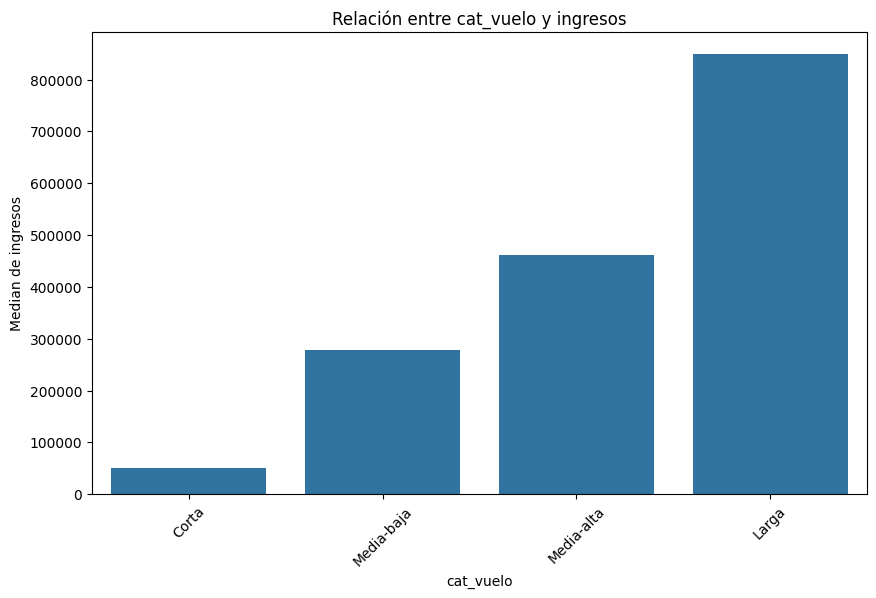

In [1182]:
plot_categorical_numerical_relationship(df_air_jun, "cat_vuelo","ingresos",measure="median") # Utilizando mediana

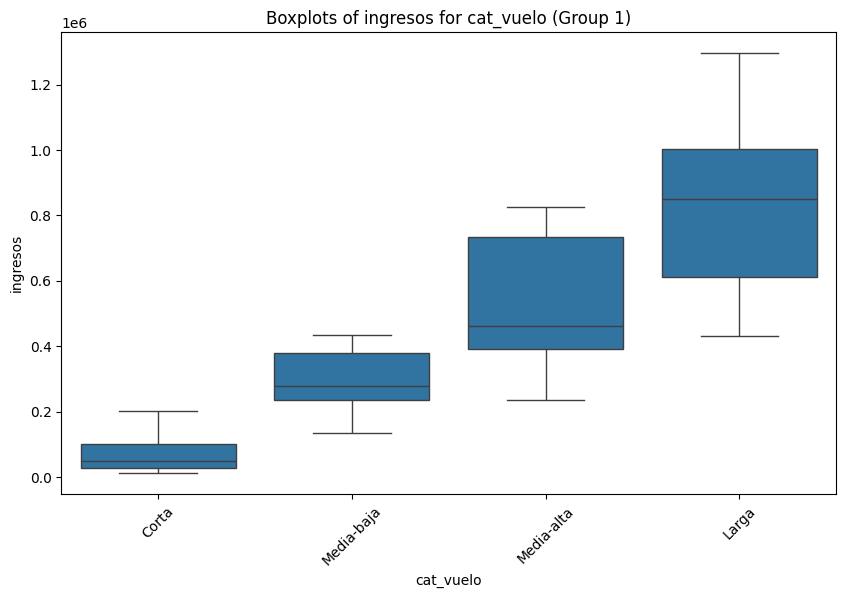

In [1183]:
plot_grouped_boxplots(df_air_jun,"cat_vuelo","ingresos")

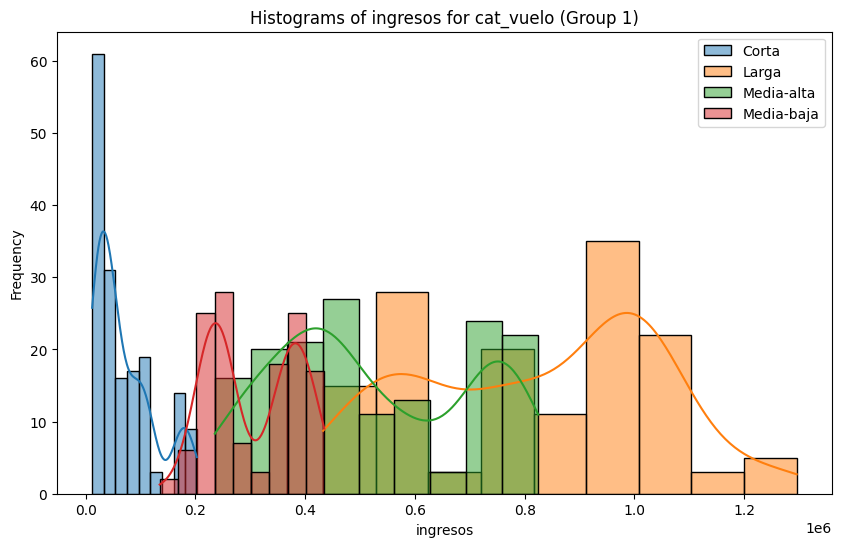

In [1184]:
plot_grouped_histograms(df_air_jun,"cat_vuelo", "ingresos", 4)

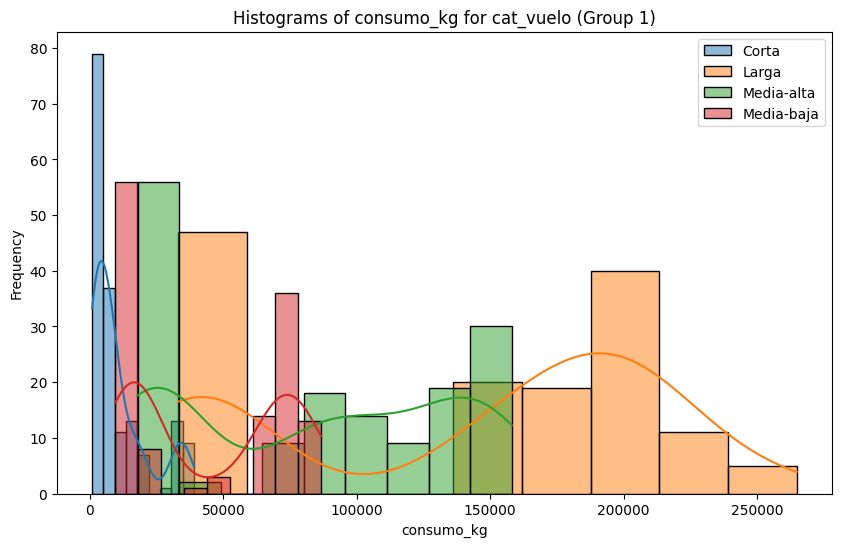

In [1185]:
plot_grouped_histograms(df_air_jun,"cat_vuelo", "consumo_kg", 4)

### Extra:

#1 Consejos para encontrar "objetivos":

Si partes de un dataset que te parece interesante pero sin pregruntras claras, haz como hicimos con el dataset de Aviones. Describe, prioriza a ojo tus variables, realiza un análisis univariante completo, realiza un análisis bivariante ente las parejas de variables que te parecieron más intereantes. Llegados a este punto si el dataset tiene riqueza informativa, algo diferente tiene que haber aparecido (otra cosa es que sea interesante para ti :-)).  

Fíjate en lo que encontramos en el dataset de viajes: la empresa de más vuelos es la que menos ingresos tiene o la existencia clara de una línea de vuelos más eficientes en consumo que otros y otra de mayor ingresos por consumo. Lo siguiente es explorar esos puntos normalmente intentando contestar a: ¿por qué pasa?¿dónde,cuándo o cómo pasa?  

Busca esas "notas discordantes" en tu dataset, ya de por sí son mensajes del análisis. Ordénalas por importancia (importancia = impactan en ingresos, impactan en la calidad de la vida de las personas, impactan en el coste y poco más hay) e intenta entender por qué suceden esas notas discordantes, cómo solucionarlas o aprovecharlas y ya tienes objeetivos para el EDA; incluso si no encuentras respuesta siempre tendras esas notas discordantes, la conclusión de que no se puede avanzar con los datos que se tienen y los próximos pasos de encontrar más información para explicar lo que ocurre.

#2 Contestando a las preguntas de "Viajes".

- Necesitamos identificar esas líneas eficientes, para ello crea una variable que mida el ingreso por kilogramo consumido y otra que mida el kilogramo consumido por kilómetro. Haz el análisis univariante de las mismas intentando encontrar una diferencia clara entre viajes eficientes y no eficientes (que sabemos que existe). Fija un umbral para indicar si un viaje es supereficiente o si no lo es
- Crea esa variable de eficiencia binaria de eficiencia.
- Ahora haz el análisis bivariante de esa eficiencia y las compañías aéreas (queremos ver si realmente eso explica la situación de TabarAir). 
- Para nota: Hacer los análisis multivariante por compañía, eficiencia, tipo de avión y compañía, eficiencia, destino e incluso el de compañía, eficiencia, origen, destino.
- Con todo ello deberías poder encontrar si hay respuesta a la situación de TabarAir además de poder mostrar otros datos interesantes.